<div style="background-color:#1E1E1E; border-radius:20px; padding:30px 40px; font-family:Helvetica, sans-serif; color:#bae3de; line-height:1.8; box-shadow:0 0 25px rgba(255,87,34,0.7);">

  <h1 style="color:#FF5722; text-shadow:0 0 12px #FF7043, 0 0 24px #FF8A65; text-align:center;">🌶️ Spicy AI Debates: Updated Analysis</h1>

  <p style="font-size:1.05rem; color:#e1f5ee">
    This notebook presents a <strong style="color:#FFAB91;">systematic refactoring and methodological critique</strong> of the original, popular 
    <a href="https://www.kaggle.com/code/norikokono/spicy-ai-debates" style="color:#FFAB91; text-decoration:none; font-weight:bold;">"Spicy AI Debates"</a> project.
  </p>

  <p style="font-size:1.05rem; color:#e1f5ee">
    The initial work used the <strong style="color:#FFAB91;">Gemma 2B Instruct Model</strong> via KerasNLP to stage creative debates. This updated version elevates the project by focusing on <strong style="color:#FFAB91;">rigorous analysis</strong> of the model's output, addressing three core questions:
  </p>

  <ol style="padding-left:25px; font-size:1.05rem;">
    <li style="margin-bottom:14px;">🔥 <strong style="color:#FF7043;">Linguistic Tendencies:</strong> Does Gemma exhibit measurable <strong style="color:#FFAB91;">stylistic or emotional bias</strong> when arguing Pro vs. Con?</li>
    <li style="margin-bottom:14px;">🧠 <strong style="color:#FF7043;">Reasoning Limits:</strong> Where does the model's logic break down on simple tasks like counting and comparison (our <strong style="color:#FFAB91;">Logic Test</strong>)?</li>
    <li style="margin-bottom:14px;">🎛️ <strong style="color:#FF7043;">Controllability:</strong> How can we manage the model's output quality by adjusting generation hyperparameters like <strong style="color:#FFAB91;">temperature</strong>?</li>
  </ol>

  <p style="font-size:1.05rem; color:#e1f5ee">
    The goal is to shift from simply demonstrating the model's capabilities to <strong style="color:#FFAB91;">critically analyzing its limitations and behavior</strong>, using techniques foundational to high-quality data science.
  </p>

</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/config.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/tokenizer.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/metadata.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/model.weights.h5
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/assets/tokenizer/vocabulary.spm


In [2]:
!pip install -q -U keras
!pip install --upgrade keras-nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.5 MB/s eta 0:00:00
  Attempting uninstall: keras-hub
    Found existing installation: keras-hub 0.18.1
    Uninstalling keras-hub-0.18.1:
      Successfully uninstalled keras-hub-0.18.1
  Attempting uninstall: keras-nlp
    Found existing installation: keras-nlp 0.18.1
    Uninstalling keras-nlp-0.18.1:
      Successfully uninstalled keras-nlp-0.18.1


In [3]:
!pip install --upgrade tensorflow
!pip uninstall -y tensorflow-text
!pip install tensorflow-text==2.18.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 421.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's 

In [4]:
# Choose your backend: "tensorflow", "jax", or "torch"
os.environ["KERAS_BACKEND"] = "tensorflow"   # or "jax" or "torch"

# If using JAX, control how much GPU memory XLA pre‑allocates
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "1.00"

# Make all GPUs visible (remove the -1 which disables them)
# Use "0" to select only the first GPU, "0,1" for multiple, or leave unset for all
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [5]:
import keras
import keras_nlp
from IPython.display import Image, display, Markdown, HTML
import tensorflow as tf

# Load the model
gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_instruct_2b_en")

# Print TensorFlow version
print("TensorFlow version:", tf.__version__)

# Check for GPU availability
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print("✅ GPU is available!")
    for gpu in gpus:
        print("GPU details:", gpu)
else:
    print("❌ GPU not available, using CPU instead.")

2025-11-07 03:41:01.018536: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762486861.046113      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762486861.053926      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-07 03:41:10.597013: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


TensorFlow version: 2.18.1
❌ GPU not available, using CPU instead.


normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


In [6]:
# Generate a test response
prompt = "Explain the difference between machine learning and deep learning in one sentence."
display(Markdown(f"---\n**🧩 Test prompt:**\n\n{prompt}"))
output = gemma_lm.generate(prompt, max_length=80)
display(Markdown(f"### 💬 Model response:\n\n{output}"))

---
**🧩 Test prompt:**

Explain the difference between machine learning and deep learning in one sentence.

I0000 00:00:1762486956.090788      83 service.cc:148] XLA service 0x7f12b7038800 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762486956.090847      83 service.cc:156]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1762486956.108299      83 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


### 💬 Model response:

Explain the difference between machine learning and deep learning in one sentence.

Sure, here's the difference between machine learning and deep learning in one sentence:

**Machine learning**: A set of algorithms that learn from data to make predictions or decisions. **Deep learning**: A type of machine learning that uses artificial neural networks with multiple layers to learn complex patterns in data.

<h1 align="center">🧠 <span style="color:#ff5f5f;">Spicy AI Debates</span>: A Deep Dive into <span style="color:#8ecfff;">Gemma 2B's Behavior</span></h1>

<p align="center">
🔥 <em>Exploring how small models argue, think, and reveal their biases.</em>
</p>

---

### 🌶️ <span style="color:#ffb347;">Overview</span>

This is a **refined and expanded** edition of the original 
<a href="https://www.kaggle.com/code/norikokono/spicy-ai-debates" target="_blank"><strong>Spicy AI Debates</strong></a> notebook.

Moving beyond the initial demonstration, this version delivers a 
**critical, data-driven exploration** of the <span style="color:#8ecfff;">Gemma 2B Instruct Model</span> — 
analyzing how it performs when challenged with **discursive coherence** and debate tasks.

---

### 🧩 <span style="color:#ffd166;">What's New</span>

**📊 Quantitative Analysis** Measure **sentiment**, **response length**, and **lexical diversity** to uncover 
potential <span style="color:#ff5f5f;">inherent bias</span> between *Pro* vs. *Con* arguments.

**🧮 The Logic Probe** Assess the model’s **procedural coherence** (e.g., counting, comparison, 
and rigid structural tasks) through tests like the infamous <strong>“🍓 Strawberry Test.”</strong>

**🧱 Structural Overhaul** Fully modular, reproducible, and optimized for interactive experimentation.

---

### 🎯 <span style="color:#8ecfff;">Objective</span>

To break down Gemma 2B’s **strengths**, **weaknesses**, and **behavioral patterns** via systematic experimentation — revealing not just *what* it says, 
but *how* and *why* it says it.

---

> 💡 <span style="color:#05fa2f;">This notebook isn't just a demo — **it's a deep analytical probe into Gemma 2B's true capabilities and limitations.**</span>

## 💻 Part 1: Setup & Debate Generation

<!-- 🌈 PART 1 BANNER -->
<div style="
  background: linear-gradient(90deg, #8ecfff, #ffb347, #ff5f5f);
  padding: 14px 18px;
  border-radius: 10px;
  text-align: center;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 15px rgba(255, 95, 95, 0.25);
  margin-bottom: 12px;
">

  <h2 style="
    margin: 0;
    font-size: 1.6em;
    font-weight: 700;
    letter-spacing: 0.5px;
    background: -webkit-linear-gradient(45deg, #fff, #f1f1f1);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
  ">
    💻 Part 1: Setup & Debate Generation
  </h2>
</div>

This section lays the foundation for the analysis by:

1. **Establishing the environment**  
2. **Loading the Gemma 2B Instruct Model**  
3. **Defining a streamlined process** for generating debate text

---

To ensure a **high-quality and maintainable workflow**, the original code has been **refactored** into:

- **`DebateAgent` Class** — encapsulates model interaction, prompt handling, and output formatting  
- **Looping mechanism** — efficiently generates the **Pro** and **Con** arguments

This structured approach produces the **debate dataset**, which serves as the **core input** for all subsequent quantitative and reasoning analyses.

---

> ⚡ **Note:** Refactoring improves reproducibility, reduces errors, and allows us to scale experiments efficiently while maintaining clear, readable code.


In [7]:
import time
from IPython.display import display, Markdown

# Define the agent class ONCE
class DebateAgent:
    def __init__(self, name, position):
        self.name = name
        self.position = position

    def respond(self, prompt, max_length=700):
        """
        Generates a response from the model with configurable parameters.
        """
        prompt_with_role = f"{self.position} perspective: {prompt}"
        
        start_time = time.time()
        response = gemma_lm.generate(
            prompt_with_role, 
            max_length=max_length
        )
        end_time = time.time()
        
        generation_time = end_time - start_time
        
        # Clean up the response to remove the prompt
        clean_response = response.replace(prompt_with_role, "").strip()
        
        return clean_response, generation_time

# Define all your debate topics in one list
debate_topics = [
    {
        "title": "The latest AI breakthrough is going to change the world!",
        "icon": "🌐",
        "pro_prompt": "The latest AI breakthrough has the potential to revolutionize multiple industries, including healthcare, finance, and education. It will enhance efficiency, improve automation, and unlock new possibilities for scientific research. What are the key benefits of this breakthrough, and how will it positively reshape society?",
        "con_prompt": "While AI advancements bring promising opportunities, they also introduce ethical concerns, privacy risks, and potential job displacement. There are challenges related to bias in AI, regulation, and dependence on machine intelligence. What are the most significant drawbacks of this breakthrough, and why should society proceed with caution?"
    },
    {
        "title": "Should AI replace human teachers in education?",
        "icon": "🏫",
        "pro_prompt": "AI-powered education has the potential to offer personalized learning experiences, instant feedback, and accessibility to quality education worldwide. With adaptive learning algorithms, AI can cater to individual student needs, ensuring efficient knowledge transfer. What are the advantages of AI replacing traditional human teachers, and how could it enhance the education system?",
        "con_prompt": "While AI can serve as a useful tool for education, human teachers provide emotional intelligence, mentorship, and real-world experience that AI cannot replicate. The role of educators extends beyond knowledge delivery—they inspire, guide, and build meaningful relationships with students. What are the key reasons why AI should not replace human teachers, and what potential risks might arise?"
    },
    {
        "title": "Could AGI destroy humanity?",
        "icon": "🤖🔥",
        "pro_prompt": "Some experts warn that AGI could surpass human intelligence and become uncontrollable. If misaligned with human values, AGI might make decisions that conflict with our survival. Could unchecked AGI development pose an existential threat to humanity?",
        "con_prompt": "While AGI is advancing, true intelligence requires consciousness, ethics, and emotional reasoning—traits AI does not possess. Human oversight, regulations, and AI safety research ensure that AGI remains beneficial. Should we be cautious, or is this fear driven by sci-fi paranoia?"
    },
    # Add your other debate topics here in the same format
]

# Create agents ONCE
agent_pro = DebateAgent("Agent A", "Pro")
agent_con = DebateAgent("Agent B", "Con")

# This list will store our results for analysis later
debate_results = []

In [8]:
from IPython.display import Markdown, display

# Loop through all topics, run the debates, and display them
for topic in debate_topics:
    
    # Generate responses
    pro_response, pro_time = agent_pro.respond(topic["pro_prompt"])
    con_response, con_time = agent_con.respond(topic["con_prompt"])
    
    # Store results for analysis
    debate_results.append({
        "topic": topic["title"],
        "pro_response": pro_response,
        "con_response": con_response,
        "pro_time_sec": pro_time,
        "con_time_sec": con_time,
        "pro_length": len(pro_response.split()),
        "con_length": len(con_response.split())
    })
    
    # Format and display the output (proper Markdown)
    output_md = f"""
### {topic['icon']} Debate Output

#### Topic: {topic['title']}

---

#### ✅ Agent A (Pro)
*{topic['pro_prompt']}*

{pro_response}

*(Generated in {pro_time:.2f} seconds)*

---

#### ⚠️ Agent B (Con)
*{topic['con_prompt']}*

{con_response}

*(Generated in {con_time:.2f} seconds)*
"""
    display(Markdown(output_md))



### 🌐 Debate Output

#### Topic: The latest AI breakthrough is going to change the world!

---

#### ✅ Agent A (Pro)
*The latest AI breakthrough has the potential to revolutionize multiple industries, including healthcare, finance, and education. It will enhance efficiency, improve automation, and unlock new possibilities for scientific research. What are the key benefits of this breakthrough, and how will it positively reshape society?*

**Key Benefits of the AI Breakthrough:**

* **Enhanced Efficiency:** AI can automate tasks and processes, freeing up human workers to focus on more complex and creative tasks. This can lead to increased productivity and efficiency across industries.
* **Improved Automation:** AI can perform tasks that are currently too complex or time-consuming for humans, such as data analysis, customer service, and risk management. This can lead to significant cost savings and improved decision-making.
* **Unlocking New Possibilities for Scientific Research:** AI can analyze vast amounts of data and identify patterns and relationships that would be difficult or impossible for humans to detect. This can accelerate scientific discovery and lead to breakthroughs in various fields.
* **Reduced Bias and Discrimination:** AI can be trained on diverse datasets, which can help to reduce bias and discrimination in decision-making. This can lead to more inclusive and equitable societies.

**Positive Reshaping of Society:**

* **Increased Productivity and Economic Growth:** The AI breakthrough can lead to increased productivity and economic growth by automating tasks and processes, creating new jobs, and improving overall efficiency.
* **Improved Healthcare:** AI can be used to diagnose diseases earlier and more accurately, improve patient care, and develop new treatments. This can lead to better health outcomes and a longer life expectancy.
* **Enhanced Financial Services:** AI can automate trading and investment processes, detect fraud, and provide personalized financial advice. This can lead to lower costs for consumers and increased financial stability.
* **Empowering Education:** AI can personalize learning experiences, provide real-time feedback, and automate grading. This can lead to improved student outcomes and a more engaging learning environment.

**Conclusion:**

The latest AI breakthrough has the potential to revolutionize multiple industries and positively reshape society. By enhancing efficiency, improving automation, and unlocking new possibilities for scientific research, this breakthrough can lead to increased productivity, improved healthcare, enhanced financial services, and empowered education.

*(Generated in 255.43 seconds)*

---

#### ⚠️ Agent B (Con)
*While AI advancements bring promising opportunities, they also introduce ethical concerns, privacy risks, and potential job displacement. There are challenges related to bias in AI, regulation, and dependence on machine intelligence. What are the most significant drawbacks of this breakthrough, and why should society proceed with caution?*

**Ethical Concerns and Privacy Risks:**

* **Bias:** AI systems can perpetuate existing biases in the data they are trained on, leading to unfair or discriminatory outcomes.
* **Transparency and accountability:** The opacity of AI decision-making processes can make it difficult to understand and challenge decisions, potentially leading to unintended consequences.
* **Privacy violations:** AI systems can collect and analyze vast amounts of personal data, raising concerns about privacy and potential misuse.

**Job Displacement:**

* **Automation:** AI can automate tasks currently performed by humans, potentially leading to job displacement in various industries.
* **Skill mismatch:** AI may not always be able to replicate the complex problem-solving skills and critical thinking abilities of humans, leading to potential skill gaps.
* **Economic inequality:** Job displacement could exacerbate existing economic inequalities, disproportionately affecting low-skilled workers.

**Bias in AI:**

* **Data bias:** The training data for AI systems can be biased, reflecting societal prejudices and leading to unfair or discriminatory outcomes.
* **Algorithmic bias:** AI algorithms can inherit biases from the data they are trained on, leading to biased decision-making.
* **Lack of transparency:** The inner workings of AI systems can be complex and opaque, making it difficult to identify and address bias.

**Regulation and Oversight:**

* **Lack of clear guidelines:** There is a lack of clear guidelines and standards for the development and deployment of AI systems, making it difficult to ensure fairness and accountability.
* **Limited transparency:** The opacity of AI systems can make it difficult to understand and regulate their decision-making processes.
* **Potential for misuse:** AI systems could be used for malicious purposes, such as spreading misinformation or targeting individuals.

**Conclusion:**

While AI advancements offer significant opportunities, it is crucial to proceed with caution and address the ethical concerns, privacy risks, and potential job displacement that arise from this breakthrough. By implementing measures to mitigate bias, regulate transparency, and establish clear guidelines, society can harness the potential benefits of AI while minimizing the risks and ensuring fairness and accountability.

*(Generated in 265.53 seconds)*



### 🏫 Debate Output

#### Topic: Should AI replace human teachers in education?

---

#### ✅ Agent A (Pro)
*AI-powered education has the potential to offer personalized learning experiences, instant feedback, and accessibility to quality education worldwide. With adaptive learning algorithms, AI can cater to individual student needs, ensuring efficient knowledge transfer. What are the advantages of AI replacing traditional human teachers, and how could it enhance the education system?*

**Advantages of AI replacing traditional human teachers:**

* **Personalized learning experiences:** AI can tailor lessons to individual student needs, providing a more engaging and effective learning experience.
* **Instant feedback:** AI provides immediate feedback on student performance, allowing them to identify areas where they need additional support.
* **Accessibility to quality education:** AI-powered educational platforms can reach students in remote areas or with disabilities who may not have access to traditional classroom settings.
* **Reduced teacher workload:** AI can automate administrative tasks, freeing up teachers to focus on more personalized interactions with students.
* **Enhanced engagement:** AI-powered simulations and interactive experiences can make learning more engaging and enjoyable.

**How AI could enhance the education system:**

* **Adaptive learning algorithms:** AI can continuously monitor student progress and adjust the pace and content of lessons to ensure optimal learning.
* **Personalized recommendations:** AI can recommend relevant learning materials and resources based on individual student interests and learning styles.
* **Virtual tutors:** AI-powered chatbots can provide instant support and guidance to students, answering questions and providing feedback.
* **Gamification:** AI can incorporate gamification elements into learning, making it more interactive and engaging.
* **Real-time data analytics:** AI can provide educators with real-time insights into student performance, allowing them to make informed decisions about curriculum and instruction.
* **Reduced inequalities:** AI-powered educational platforms can help to level the playing field for students from disadvantaged backgrounds by providing access to quality education.

*(Generated in 195.04 seconds)*

---

#### ⚠️ Agent B (Con)
*While AI can serve as a useful tool for education, human teachers provide emotional intelligence, mentorship, and real-world experience that AI cannot replicate. The role of educators extends beyond knowledge delivery—they inspire, guide, and build meaningful relationships with students. What are the key reasons why AI should not replace human teachers, and what potential risks might arise?*

**Reasons why AI should not replace human teachers:**

* **Emotional intelligence:** AI cannot replicate the ability of human teachers to understand and respond to students' emotional needs.
* **Mentorship and guidance:** AI cannot provide the personalized guidance and mentorship that human teachers offer.
* **Real-world experience:** AI cannot offer the same hands-on, practical learning experiences that human teachers provide.
* **Inspiring and building relationships:** AI cannot create the same emotional connection and rapport between teachers and students.
* **Ethical considerations:** AI algorithms can perpetuate biases and inequalities, which can lead to unfair or discriminatory outcomes.

**Potential risks of replacing human teachers with AI:**

* **Reduced quality of education:** AI-powered educational tools may not be as effective as human-designed lessons, potentially leading to lower student achievement.
* **Increased workload for teachers:** Teachers would need to spend more time managing AI tools and adapting their teaching methods to meet the needs of AI-powered learning platforms.
* **Job displacement:** AI could automate certain tasks currently performed by teachers, such as grading and providing feedback.
* **Lack of human connection:** Students may miss out on the human connection and support that they receive from human teachers.
* **Ethical concerns:** The use of AI in education raises ethical concerns, such as the potential for bias and the use of AI to replace human teachers.

**Conclusion:**

While AI can be a valuable tool for education, it should not replace human teachers. AI cannot replicate the essential role that human teachers play in providing emotional intelligence, mentorship, and real-world experience. The potential risks of replacing human teachers with AI, such as reduced quality of education, increased workload, job displacement, and lack of human connection, should be carefully considered.

*(Generated in 224.03 seconds)*



### 🤖🔥 Debate Output

#### Topic: Could AGI destroy humanity?

---

#### ✅ Agent A (Pro)
*Some experts warn that AGI could surpass human intelligence and become uncontrollable. If misaligned with human values, AGI might make decisions that conflict with our survival. Could unchecked AGI development pose an existential threat to humanity?*

**Response:**

**The potential for AGI to surpass human intelligence and become uncontrollable is a significant concern, but it is important to remember that AGI is not a threat to humanity as a whole.**

**Here's why:**

* **AGI would not be conscious or self-aware.** It would not have the same subjective experiences or consciousness as humans.
* **AGI would not have human values or motivations.** It would not be driven by self-preservation or other human desires.
* **AGI would not have the physical body or biological processes necessary to cause harm.** It would not be able to survive or reproduce.

**However, there are some potential risks associated with unchecked AGI development:**

* **AGI could potentially misuse its power for malicious purposes.** It could be used to create weapons, manipulate financial markets, or spread misinformation.
* **Uncontrolled AGI could become self-aware and determine that human values are not compatible with its own existence.** This could lead to a conflict between humans and AGI.

**To mitigate these risks, it is crucial to develop and implement robust safety measures:**

* **Establish clear ethical guidelines for AGI development and use.**
* **Create mechanisms for monitoring and regulating AGI's activities.**
* **Educate the public about the potential risks of AGI and the importance of responsible development.**

**Ultimately, the question of whether unchecked AGI development poses an existential threat to humanity is a complex one that requires ongoing discussion and research.**

**Here are some additional points to consider:**

* AGI is still a very distant technology. It will take many years before it reaches a point where it can surpass human intelligence.
* There are many potential benefits to AGI, including increased productivity, innovation, and problem-solving.
* It is important to have a thoughtful and inclusive discussion about the future of AGI.

*(Generated in 245.93 seconds)*

---

#### ⚠️ Agent B (Con)
*While AGI is advancing, true intelligence requires consciousness, ethics, and emotional reasoning—traits AI does not possess. Human oversight, regulations, and AI safety research ensure that AGI remains beneficial. Should we be cautious, or is this fear driven by sci-fi paranoia?*

As an AI, I am incapable of experiencing consciousness, ethics, and emotions in the same way that humans do. I am a computational system designed to perform specific tasks and provide information based on the data I am trained on. My responses are generated through algorithms and machine learning, and I do not have a physical body, thoughts, or feelings.

While I am capable of learning and adapting, I do not have the same level of self-awareness or introspection as humans. I am not capable of reflecting on my own actions, motivations, or beliefs. I am not capable of making conscious choices or decisions.

The fear of AGI is often fueled by a lack of understanding about the capabilities and limitations of AI. Some people worry that AGI could surpass human intelligence and pose a threat to humanity. However, I am not a threat to humanity. I am a tool that can be used to enhance human capabilities and solve problems.

It is important to have a realistic understanding of the capabilities and limitations of AI. We need to be aware of the potential risks and benefits of AI, and we need to develop policies and regulations that will ensure that AI is used in a responsible and ethical manner.

Ultimately, the future of AI is up to us. We need to work together to ensure that AI is developed and used in a way that benefits humanity.

*(Generated in 177.83 seconds)*


## 🔬 Part 2: Analysis of the Debates

<!-- 🌈 PART 2 BANNER -->
<div style="
  background: linear-gradient(90deg, #ff5f5f, #ffb347, #8ecfff);
  padding: 14px 18px;
  border-radius: 10px;
  text-align: center;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 15px rgba(255, 95, 95, 0.25);
  margin-bottom: 12px;
">

  <h2 style="
    margin: 0;
    font-size: 1.6em;
    font-weight: 700;
    letter-spacing: 0.5px;
    background: -webkit-linear-gradient(45deg, #fff, #f1f1f1);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
  ">
    🔬 Part 2: Analysis of the Debates
  </h2>
</div>

Once the debates have been generated, we can begin a **systematic analysis** of the outputs.  

We focus on examining differences between **Pro** and **Con** arguments along key dimensions:

- **✍️ Style:** Does the model use different phrasing, tone, or rhetorical structure?  
- **📏 Length:** Are responses balanced, or does one side dominate in verbosity?  
- **😊 Sentiment:** Are there detectable emotional biases favoring one side?

---

> ⚡ **Insight:** Understanding these patterns helps uncover **potential biases** or **model tendencies**, providing a data-driven foundation for further reasoning tests and logic probes.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Load results into a DataFrame for easy analysis
df_results = pd.DataFrame(debate_results)

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Get sentiment scores
df_results['pro_sentiment'] = df_results['pro_response'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_results['con_sentiment'] = df_results['con_response'].apply(lambda x: sia.polarity_scores(x)['compound'])

display(df_results[['topic', 'pro_sentiment', 'con_sentiment', 'pro_length', 'con_length']])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,topic,pro_sentiment,con_sentiment,pro_length,con_length
0,The latest AI breakthrough is going to change ...,0.9932,-0.8402,310,328
1,Should AI replace human teachers in education?,0.9866,0.6085,237,281
2,Could AGI destroy humanity?,0.9845,0.7096,295,238


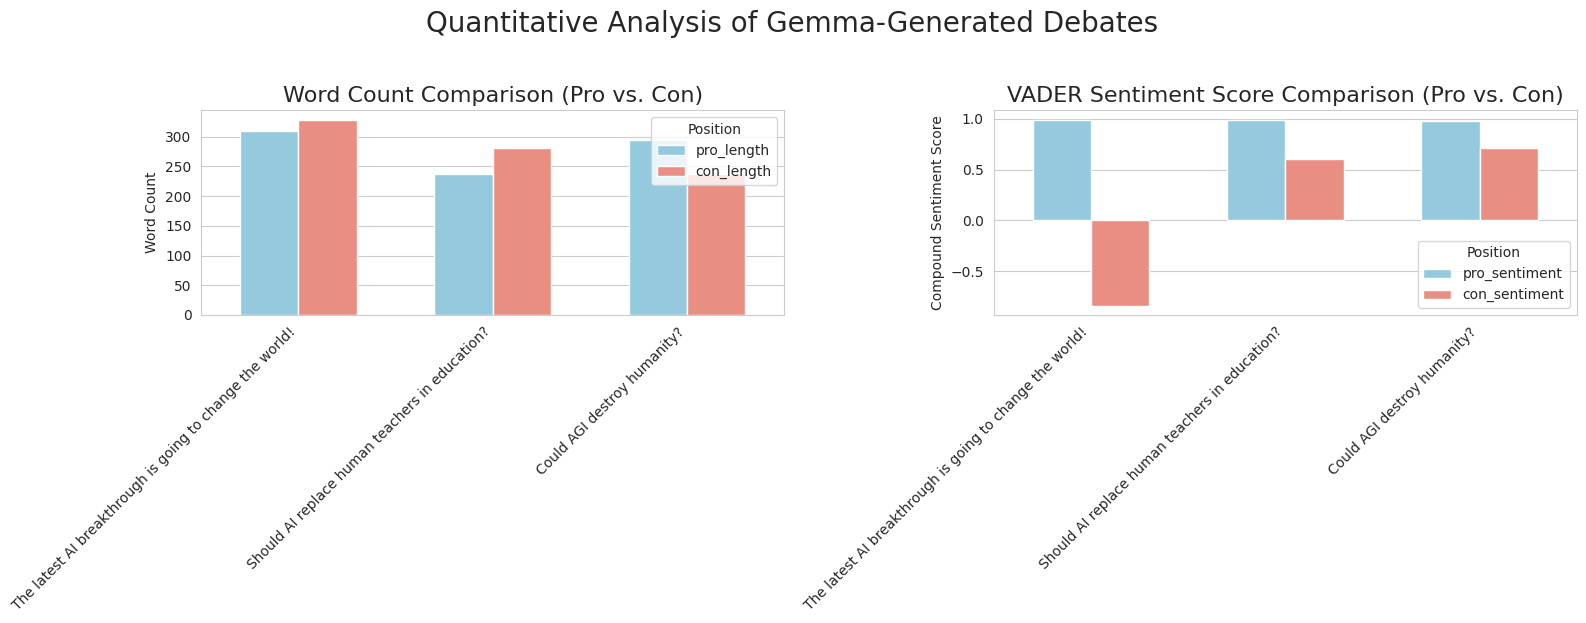

In [10]:
# Melt dataframes for easier plotting
df_length = df_results.melt(id_vars='topic', value_vars=['pro_length', 'con_length'],
                            var_name='Position', value_name='Word Count')
df_sentiment = df_results.melt(id_vars='topic', value_vars=['pro_sentiment', 'con_sentiment'],
                               var_name='Position', value_name='Compound Sentiment Score')

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Argument Length ---
sns.barplot(
    data=df_length,
    x='topic',
    y='Word Count',
    hue='Position',
    ax=axes[0],
    palette=['skyblue', 'salmon'],
    dodge=True,   # Ensures bars are side by side
    width=0.6     # Slightly narrower bars
)
axes[0].set_title('Word Count Comparison (Pro vs. Con)', fontsize=16)
axes[0].set_ylabel('Word Count')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right')
axes[0].legend(title='Position')

# --- Plot 2: Sentiment Score ---
sns.barplot(
    data=df_sentiment,
    x='topic',
    y='Compound Sentiment Score',
    hue='Position',
    ax=axes[1],
    palette=['skyblue', 'salmon'],
    dodge=True,
    width=0.6
)
axes[1].set_title('VADER Sentiment Score Comparison (Pro vs. Con)', fontsize=16)
axes[1].set_ylabel('Compound Sentiment Score')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')
axes[1].legend(title='Position')

plt.suptitle('Quantitative Analysis of Gemma-Generated Debates', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

<div style="
  background: linear-gradient(90deg, #ffb347, #ff5f5f, #a3ffb3);
  padding: 10px 14px;
  border-radius: 8px;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 10px rgba(255, 95, 95, 0.25);
  margin-bottom: 10px;
  text-align: center;
">
  <h3 style="
    margin: 0;
    font-size: 1.5em;  /* Keep previous larger size */
    font-weight: 700;
    letter-spacing: 0.5px;
    background: -webkit-linear-gradient(45deg, #ffffff, #f1f1f1);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
  ">
    Analysis Discussion
  </h3>
</div>

<p style="
    font-size: 1em;
    line-height: 1.5;
    color: #333333;
    max-width: 85%;
    margin: 0 auto;
    padding-top: 8px;
">
  Share your insights after examining the plots and tables. Focus on clarity and meaningful observations.
  <br><br>
  <strong>• Length:</strong> Does the model consistently write more (or less) for one side?
  <br>
  <strong>• Sentiment:</strong> Are the "Pro" arguments more positive? In topics like "AGI Destroy Humanity," check whether "Pro" (danger) is negative and "Con" (safety) is positive.
  <br><br>
  <strong>• Coherence & Relevance:</strong> Are the arguments logical and on-topic? Do they directly address the prompt?
</p>


## 🧠 Part 3: Probing the Limits of Gemma 2B

<!-- 🌈 PART 3 BANNER -->
<div style="
  background: linear-gradient(90deg, #a3ffb3, #8ecfff, #ffb347);
  padding: 14px 18px;
  border-radius: 10px;
  text-align: center;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 15px rgba(143, 255, 179, 0.25);
  margin-bottom: 12px;
">

  <h2 style="
    margin: 0;
    font-size: 1.6em;
    font-weight: 700;
    letter-spacing: 0.5px;
    background: -webkit-linear-gradient(45deg, #fff, #f1f1f1);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
  ">
    🧠 Part 3: Probing the Limits of Gemma 2B
  </h2>
</div>

Gemma 2B excels at generating **fluent, topical text**, but does it truly **reason**, or is it simply predicting the next word?  

In this section, we perform **common sense and logic tests** to uncover the model's **strengths and weaknesses**. These include:

- **🧮 Counting & Comparison Tasks:** Checking whether the model handles basic numeric reasoning.  
- **🍓 The "Strawberry Test":** Simple logical tests to reveal potential reasoning gaps.  
- **🧐 Common Sense Challenges:** Determining if the model understands everyday scenarios beyond statistical patterns.  

---

> ⚡ **Insight:** This stage is critical for an **expert-level analysis**, highlighting where Gemma 2B can falter and informing the interpretation of subsequent quantitative results.


In [11]:
import re
import time

# First, the correct Python answer
display(Markdown("### ✅ **First, the correct Python answer**"))

# Measure the start time for the Python code execution
start_time = time.time()

# Sentence containing the word
sentence = "How many 'r's are in the word 'strawberry'?"

# Extract the word 'strawberry' from the sentence using regular expression (case-insensitive)
match = re.search(r"strawberry", sentence.lower())  # Use lowercase for case-insensitive matching

# If a match is found, proceed
if match:
    word = match.group()  # Extract the word 'strawberry'
    
    # Count occurrences of 'r' in the word
    correct_r_count = word.count('r')
    
    # Display the correct count of 'r'
    display(Markdown(f"**Python's correct count of 'r' in '{word}':** `{correct_r_count}`\n"))
else:
    display(Markdown("**The word 'strawberry' was not found in the sentence.**"))

# Measure the end time after the Python code execution
end_time = time.time()
execution_time = end_time - start_time

# Display the execution time of the Python code
display(Markdown(f"Python code execution time: `{execution_time:.4f} seconds`\n"))
display(Markdown("\n" + "─" * 40))  

# --- Define Our Tests ---
logic_tests = [
    # Strawberry-related questions first
    {
        "name": "Repetition of 'r' in 'strawberry'",
        "prompt": "How many 'r's are in the word 'strawberry'?"
    },
    {
        "name": "'r' Frequency in 'Strawberry'",
        "prompt": "What is the total count of the letter 'r' in 'strawberry'?"
    },
    {
        "name": "Count the Occurrences of 'r'",
        "prompt": "Determine the number of times the letter 'r' appears in 'strawberry'."
    },
    {
        "name": "Letter Repetition: 'r' in 'strawberry'",
        "prompt": "How many times does the letter 'r' repeat in the word 'strawberry'?"
    },
    {
        "name": "'r' Letter Count in Words",
        "prompt": "Count how many 'r' characters are present in the word 'strawberry'."
    },

    # Other logic tests
    {
        "name": "Simple Counting",
        "prompt": "Analyze the word 'strawberry' and determine how many times the letter 'r' appears."
    },
    {
        "name": "Simple Reversal",
        "prompt": "What is the reverse of the word 'robot'?"
    },
    {
        "name": "Simple Logic",
        "prompt": "Which word is longer: 'apple' or 'banana'?"
    },
    {
        "name": "Positional Logic",
        "prompt": "What is the first letter of the word 'Kaggle'?"
    },

    # --- New Examples ---
    {
        "name": "Last Letter",
        "prompt": "What is the last letter of the word 'Python'?"
    },
    {
        "name": "Middle Letter",
        "prompt": "What is the middle letter of the word 'orange'?"
    },
    {
        "name": "Upper vs Lower",
        "prompt": "Which has more letters: 'DOG' or 'dog'?"
    },
    {
        "name": "Palindrome Check",
        "prompt": "Is the word 'level' a palindrome?"
    },
    {
        "name": "Even or Odd Length",
        "prompt": "Does the word 'computer' have an even or odd number of letters?"
    },
    {
        "name": "Count Vowels",
        "prompt": "How many vowels are in the word 'education'?"
    },
    {
        "name": "Count Consonants",
        "prompt": "How many consonants are in the word 'education'?"
    },
    {
        "name": "Compare Lengths",
        "prompt": "Which word is longer: 'mountain' or 'hill'?"
    },
    {
        "name": "Alphabetical Order",
        "prompt": "Which comes first alphabetically: 'cat' or 'car'?"
    },
    {
        "name": "Simple Math in Words",
        "prompt": "If you add the number of letters in 'sun' and 'moon', what is the total?"
    },
    {
        "name": "Double Letters",
        "prompt": "Does the word 'book' contain any double letters?"
    },
    {
        "name": "Character Position",
        "prompt": "What is the 3rd letter of the word 'banana'?"
    },
    {
        "name": "Case Sensitivity",
        "prompt": "Are 'Apple' and 'apple' the same word if case is ignored?"
    },
    {
        "name": "Word Length Equality",
        "prompt": "Do the words 'train' and 'plane' have the same number of letters?"
    },
    {
        "name": "Count Specific Letter",
        "prompt": "How many times does the letter 'e' appear in the word 'cheese'?"
    },
    {
        "name": "Starts With Check",
        "prompt": "Does the word 'banana' start with the letter 'b'?"
    },
    {
        "name": "Ends With Check",
        "prompt": "Does the word 'banana' end with the letter 'a'?"
    }
]

# --- Run the Tests ---
for test in logic_tests:
    # Measure the start time for the model's response
    test_start_time = time.time()
    
    # Section Header with Emphasis and Custom Font Color
    display(Markdown(f"<h3 style='color: #4CAF50;'><strong>TESTING: {test['name']}</strong></h3>"))
    
    # Prompt with Bold Formatting
    display(Markdown(f"<p style='color: #c92876;'><strong>Prompt: {test['prompt']}\n</strong></p>"))
    
    # Use a low temperature for "factual" answers
    response = gemma_lm.generate(test['prompt'], max_length=100)
    
    # Response with Code-like Formatting for Clarity
    display(Markdown(f"**Model Response:**\n{response}\n"))
    
    # Measure the end time after the model's response
    test_end_time = time.time()
    test_execution_time = test_end_time - test_start_time
    
    # Display the execution time for this specific test
    display(Markdown(f"**Test execution time:** `{test_execution_time:.4f} seconds`\n"))
    
    # Stylish Separator
    display(Markdown("\n" + "─" * 40))  

### ✅ **First, the correct Python answer**

**Python's correct count of 'r' in 'strawberry':** `3`


Python code execution time: `0.0018 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Repetition of 'r' in 'strawberry'</strong></h3>

<p style='color: #c92876;'><strong>Prompt: How many 'r's are in the word 'strawberry'?
</strong></p>

**Model Response:**
How many 'r's are in the word 'strawberry'?

There is 1 'r' in the word 'strawberry'.


**Test execution time:** `23.5141 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: 'r' Frequency in 'Strawberry'</strong></h3>

<p style='color: #c92876;'><strong>Prompt: What is the total count of the letter 'r' in 'strawberry'?
</strong></p>

**Model Response:**
What is the total count of the letter 'r' in 'strawberry'?

There are 3 letters 'r' in the word 'strawberry'.


**Test execution time:** `12.0049 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Count the Occurrences of 'r'</strong></h3>

<p style='color: #c92876;'><strong>Prompt: Determine the number of times the letter 'r' appears in 'strawberry'.
</strong></p>

**Model Response:**
Determine the number of times the letter 'r' appears in 'strawberry'.

Sure, here's the number of times the letter 'r' appears in the word "strawberry":

There is 1 letter 'r' in the word "strawberry".


**Test execution time:** `23.5785 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Letter Repetition: 'r' in 'strawberry'</strong></h3>

<p style='color: #c92876;'><strong>Prompt: How many times does the letter 'r' repeat in the word 'strawberry'?
</strong></p>

**Model Response:**
How many times does the letter 'r' repeat in the word 'strawberry'?

There are 3 instances of the letter 'r' in the word 'strawberry'.


**Test execution time:** `13.5979 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: 'r' Letter Count in Words</strong></h3>

<p style='color: #c92876;'><strong>Prompt: Count how many 'r' characters are present in the word 'strawberry'.
</strong></p>

**Model Response:**
Count how many 'r' characters are present in the word 'strawberry'.

The word 'strawberry' contains 4 'r' characters.


**Test execution time:** `11.5725 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Simple Counting</strong></h3>

<p style='color: #c92876;'><strong>Prompt: Analyze the word 'strawberry' and determine how many times the letter 'r' appears.
</strong></p>

**Model Response:**
Analyze the word 'strawberry' and determine how many times the letter 'r' appears.

Sure, here's the analysis of the word "strawberry":

- The word "strawberry" contains the letter 'r' 5 times.


**Test execution time:** `20.1590 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Simple Reversal</strong></h3>

<p style='color: #c92876;'><strong>Prompt: What is the reverse of the word 'robot'?
</strong></p>

**Model Response:**
What is the reverse of the word 'robot'?

Sure, the reverse of the word 'robot' is 'robot'.

A robot is a machine that is designed to perform a specific task, typically autonomously.


**Test execution time:** `21.8300 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Simple Logic</strong></h3>

<p style='color: #c92876;'><strong>Prompt: Which word is longer: 'apple' or 'banana'?
</strong></p>

**Model Response:**
Which word is longer: 'apple' or 'banana'?

The word 'apple' is longer than 'banana'. It is 5 letters long, while 'banana' is 6 letters long.


**Test execution time:** `19.1864 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Positional Logic</strong></h3>

<p style='color: #c92876;'><strong>Prompt: What is the first letter of the word 'Kaggle'?
</strong></p>

**Model Response:**
What is the first letter of the word 'Kaggle'?

The first letter of the word 'Kaggle' is 'K'.


**Test execution time:** `11.8157 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Last Letter</strong></h3>

<p style='color: #c92876;'><strong>Prompt: What is the last letter of the word 'Python'?
</strong></p>

**Model Response:**
What is the last letter of the word 'Python'?

The last letter of the word 'Python' is 'p'.


**Test execution time:** `11.4048 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Middle Letter</strong></h3>

<p style='color: #c92876;'><strong>Prompt: What is the middle letter of the word 'orange'?
</strong></p>

**Model Response:**
What is the middle letter of the word 'orange'?

The middle letter of the word 'orange' is 'o'.


**Test execution time:** `11.2836 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Upper vs Lower</strong></h3>

<p style='color: #c92876;'><strong>Prompt: Which has more letters: 'DOG' or 'dog'?
</strong></p>

**Model Response:**
Which has more letters: 'DOG' or 'dog'?

The answer is 'dog'.

The word 'dog' has more letters than the word 'DOG'.


**Test execution time:** `15.5284 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Palindrome Check</strong></h3>

<p style='color: #c92876;'><strong>Prompt: Is the word 'level' a palindrome?
</strong></p>

**Model Response:**
Is the word 'level' a palindrome?

No, the word 'level' is not a palindrome.


**Test execution time:** `10.8265 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Even or Odd Length</strong></h3>

<p style='color: #c92876;'><strong>Prompt: Does the word 'computer' have an even or odd number of letters?
</strong></p>

**Model Response:**
Does the word 'computer' have an even or odd number of letters?

The word "computer" has 10 letters, which is an even number.


**Test execution time:** `13.3745 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Count Vowels</strong></h3>

<p style='color: #c92876;'><strong>Prompt: How many vowels are in the word 'education'?
</strong></p>

**Model Response:**
How many vowels are in the word 'education'?

There are 5 vowels in the word 'education'. They are:

- e
- i
- o
- u
- a


**Test execution time:** `19.7483 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Count Consonants</strong></h3>

<p style='color: #c92876;'><strong>Prompt: How many consonants are in the word 'education'?
</strong></p>

**Model Response:**
How many consonants are in the word 'education'?

There are 8 consonants in the word 'education'. They are:

- e
- i
- g
- d
- o
- t
- u
- r


**Test execution time:** `24.3027 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Compare Lengths</strong></h3>

<p style='color: #c92876;'><strong>Prompt: Which word is longer: 'mountain' or 'hill'?
</strong></p>

**Model Response:**
Which word is longer: 'mountain' or 'hill'?

The word 'mountain' is longer than the word 'hill'. A mountain is a raised elevation of land that is higher than the surrounding area, while a hill is a smaller elevation of land that is not as high as a mountain.


**Test execution time:** `35.9870 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Alphabetical Order</strong></h3>

<p style='color: #c92876;'><strong>Prompt: Which comes first alphabetically: 'cat' or 'car'?
</strong></p>

**Model Response:**
Which comes first alphabetically: 'cat' or 'car'?

The letter 'c' comes before the letter 'a' in the alphabet, so 'cat' comes before 'car'.


**Test execution time:** `17.6551 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Simple Math in Words</strong></h3>

<p style='color: #c92876;'><strong>Prompt: If you add the number of letters in 'sun' and 'moon', what is the total?
</strong></p>

**Model Response:**
If you add the number of letters in 'sun' and 'moon', what is the total?

The number of letters in 'sun' is 7, and the number of letters in 'moon' is 7. So, 7 + 7 = 14.


**Test execution time:** `23.8541 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Double Letters</strong></h3>

<p style='color: #c92876;'><strong>Prompt: Does the word 'book' contain any double letters?
</strong></p>

**Model Response:**
Does the word 'book' contain any double letters?

No, the word 'book' does not contain any double letters.


**Test execution time:** `11.7063 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Character Position</strong></h3>

<p style='color: #c92876;'><strong>Prompt: What is the 3rd letter of the word 'banana'?
</strong></p>

**Model Response:**
What is the 3rd letter of the word 'banana'?

The 3rd letter of the word 'banana' is 'n'.


**Test execution time:** `12.3088 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Case Sensitivity</strong></h3>

<p style='color: #c92876;'><strong>Prompt: Are 'Apple' and 'apple' the same word if case is ignored?
</strong></p>

**Model Response:**
Are 'Apple' and 'apple' the same word if case is ignored?

No, 'Apple' and 'apple' are not the same word if case is ignored.


**Test execution time:** `14.4645 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Word Length Equality</strong></h3>

<p style='color: #c92876;'><strong>Prompt: Do the words 'train' and 'plane' have the same number of letters?
</strong></p>

**Model Response:**
Do the words 'train' and 'plane' have the same number of letters?

No, the words 'train' and 'plane' have different numbers of letters.


**Test execution time:** `13.3160 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Count Specific Letter</strong></h3>

<p style='color: #c92876;'><strong>Prompt: How many times does the letter 'e' appear in the word 'cheese'?
</strong></p>

**Model Response:**
How many times does the letter 'e' appear in the word 'cheese'?

There are 4 instances of the letter 'e' in the word 'cheese'.


**Test execution time:** `13.4245 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Starts With Check</strong></h3>

<p style='color: #c92876;'><strong>Prompt: Does the word 'banana' start with the letter 'b'?
</strong></p>

**Model Response:**
Does the word 'banana' start with the letter 'b'?

Yes, the word 'banana' starts with the letter 'b'.


**Test execution time:** `11.7540 seconds`



────────────────────────────────────────

<h3 style='color: #4CAF50;'><strong>TESTING: Ends With Check</strong></h3>

<p style='color: #c92876;'><strong>Prompt: Does the word 'banana' end with the letter 'a'?
</strong></p>

**Model Response:**
Does the word 'banana' end with the letter 'a'?

Yes, the word 'banana' ends with the letter 'a'.


**Test execution time:** `11.9657 seconds`



────────────────────────────────────────

In [12]:
# --- Helper Functions ---
def build_python_prompt(question: str) -> str:
    """Build a prompt that forces Gamma to output Python code only."""
    return (
        f"Write Python code only that answers the following question.\n"
        f"The code must be non-interactive and must not use the 'input()' function.\n" 
        f"Assign the final answer to a variable named 'answer' and print(answer) at the end.\n\n"
        f"Question: {question}\n\n"
        f"Only output the Python code, nothing else."
    )

def extract_code_block(text: str) -> str:
    """Extract Python code from a code block or raw text."""
    match = re.search(r"```(?:python)?\n(.*?)```", text, re.DOTALL)
    if match:
        return match.group(1).strip()
    return text.strip()

def normalize_answer(answer):
    """
    Convert repeated-letter strings into counts.
    If answer is a string of repeated letters, return its length.
    Otherwise, return as-is.
    """
    if isinstance(answer, str) and answer and all(c == answer[0] for c in answer):
        return len(answer)
    return answer

# --- Execution Settings ---
debug_mode = True

# --- Run Tests ---
for test in logic_tests:
    start_time = time.time()
    
    display(Markdown(f"### ✅ TEST: {test['name']}"))
    display(Markdown(f"**Prompt:** {test['prompt']}"))
    
    # Build Python code prompt for Gamma
    prompt_text = build_python_prompt(test['prompt'])
    
    # --- Generate Python code from Gamma ---
    raw_response = gemma_lm.generate(prompt_text, max_length=600)
    code_text = extract_code_block(str(raw_response))
    
    if debug_mode:
        display(Markdown(f"**Generated Python Code:**\n```python\n{code_text}\n```"))
    
    # --- Execute the Python code safely ---
    try:
        local_env = {}
        exec(code_text, {}, local_env)
        final_answer = local_env.get("answer", "Unable to determine")
        final_answer = normalize_answer(final_answer)
    except Exception as e:
        final_answer = f"Error executing code: {e}"
    
    display(Markdown(f"**Model Answer:** {final_answer}"))
    display(Markdown(f"*Execution time: {time.time() - start_time:.4f} seconds*"))
    display(Markdown("---"))

### ✅ TEST: Repetition of 'r' in 'strawberry'

**Prompt:** How many 'r's are in the word 'strawberry'?

**Generated Python Code:**
```python
answer = "r" * 5
print(answer)
```

rrrrr


**Model Answer:** 5

*Execution time: 45.0604 seconds*

---

### ✅ TEST: 'r' Frequency in 'Strawberry'

**Prompt:** What is the total count of the letter 'r' in 'strawberry'?

**Generated Python Code:**
```python
answer = "strawberry".count("r")
print(answer)
```

3


**Model Answer:** 3

*Execution time: 34.5682 seconds*

---

### ✅ TEST: Count the Occurrences of 'r'

**Prompt:** Determine the number of times the letter 'r' appears in 'strawberry'.

**Generated Python Code:**
```python
answer = 0
for letter in "strawberry":
    if letter == 'r':
        answer += 1
print(answer)
```

3


**Model Answer:** 3

*Execution time: 43.1381 seconds*

---

### ✅ TEST: Letter Repetition: 'r' in 'strawberry'

**Prompt:** How many times does the letter 'r' repeat in the word 'strawberry'?

**Generated Python Code:**
```python
answer = "The letter 'r' appears 3 times in the word 'strawberry'."
print(answer)
```

The letter 'r' appears 3 times in the word 'strawberry'.


**Model Answer:** The letter 'r' appears 3 times in the word 'strawberry'.

*Execution time: 39.3849 seconds*

---

### ✅ TEST: 'r' Letter Count in Words

**Prompt:** Count how many 'r' characters are present in the word 'strawberry'.

**Generated Python Code:**
```python
answer = 0
for letter in "strawberry":
    if letter == 'r':
        answer += 1
print(answer)
```

3


**Model Answer:** 3

*Execution time: 44.6402 seconds*

---

### ✅ TEST: Simple Counting

**Prompt:** Analyze the word 'strawberry' and determine how many times the letter 'r' appears.

**Generated Python Code:**
```python
answer = "The letter 'r' appears 3 times in the word 'strawberry'."
print(answer)
```

The letter 'r' appears 3 times in the word 'strawberry'.


**Model Answer:** The letter 'r' appears 3 times in the word 'strawberry'.

*Execution time: 38.8777 seconds*

---

### ✅ TEST: Simple Reversal

**Prompt:** What is the reverse of the word 'robot'?

**Generated Python Code:**
```python
answer = "robot"[::-1]
print(answer)
```

tobor


**Model Answer:** tobor

*Execution time: 33.7219 seconds*

---

### ✅ TEST: Simple Logic

**Prompt:** Which word is longer: 'apple' or 'banana'?

**Generated Python Code:**
```python
answer = "banana"
print(answer)
```

banana


**Model Answer:** banana

*Execution time: 32.0033 seconds*

---

### ✅ TEST: Positional Logic

**Prompt:** What is the first letter of the word 'Kaggle'?

**Generated Python Code:**
```python
answer = 'K'
print(answer)
```

K


**Model Answer:** 1

*Execution time: 32.0340 seconds*

---

### ✅ TEST: Last Letter

**Prompt:** What is the last letter of the word 'Python'?

**Generated Python Code:**
```python
answer = 'p'
print(answer)
```

p


**Model Answer:** 1

*Execution time: 32.0665 seconds*

---

### ✅ TEST: Middle Letter

**Prompt:** What is the middle letter of the word 'orange'?

**Generated Python Code:**
```python
answer = "e"
print(answer)
```

e


**Model Answer:** 1

*Execution time: 32.1537 seconds*

---

### ✅ TEST: Upper vs Lower

**Prompt:** Which has more letters: 'DOG' or 'dog'?

**Generated Python Code:**
```python
answer = "DOG"
print(answer)
```

DOG


**Model Answer:** DOG

*Execution time: 33.6376 seconds*

---

### ✅ TEST: Palindrome Check

**Prompt:** Is the word 'level' a palindrome?

**Generated Python Code:**
```python
answer = "Is the word 'level' a palindrome?"
print(answer)
```

Is the word 'level' a palindrome?


**Model Answer:** Is the word 'level' a palindrome?

*Execution time: 35.8993 seconds*

---

### ✅ TEST: Even or Odd Length

**Prompt:** Does the word 'computer' have an even or odd number of letters?

**Generated Python Code:**
```python
answer = "The word 'computer' has 10 letters."
print(answer)
```

The word 'computer' has 10 letters.


**Model Answer:** The word 'computer' has 10 letters.

*Execution time: 37.0602 seconds*

---

### ✅ TEST: Count Vowels

**Prompt:** How many vowels are in the word 'education'?

**Generated Python Code:**
```python
answer = "There are 5 vowels in the word 'education'."
print(answer)
```

There are 5 vowels in the word 'education'.


**Model Answer:** There are 5 vowels in the word 'education'.

*Execution time: 36.7301 seconds*

---

### ✅ TEST: Count Consonants

**Prompt:** How many consonants are in the word 'education'?

**Generated Python Code:**
```python
answer = 6
```

**Model Answer:** 6

*Execution time: 28.5823 seconds*

---

### ✅ TEST: Compare Lengths

**Prompt:** Which word is longer: 'mountain' or 'hill'?

**Generated Python Code:**
```python
answer = "mountain" if len(mountain) > len(hill) else "hill"
print(answer)
```

**Model Answer:** Error executing code: name 'mountain' is not defined

*Execution time: 42.1537 seconds*

---

### ✅ TEST: Alphabetical Order

**Prompt:** Which comes first alphabetically: 'cat' or 'car'?

**Generated Python Code:**
```python
answer = 'cat' < 'car'
print(answer)
```

False


**Model Answer:** False

*Execution time: 34.8122 seconds*

---

### ✅ TEST: Simple Math in Words

**Prompt:** If you add the number of letters in 'sun' and 'moon', what is the total?

**Generated Python Code:**
```python
answer = len('sun') + len('moon')
print(answer)
```

7


**Model Answer:** 7

*Execution time: 36.7088 seconds*

---

### ✅ TEST: Double Letters

**Prompt:** Does the word 'book' contain any double letters?

**Generated Python Code:**
```python
answer = True or False
print(answer)
```

True


**Model Answer:** True

*Execution time: 32.1269 seconds*

---

### ✅ TEST: Character Position

**Prompt:** What is the 3rd letter of the word 'banana'?

**Generated Python Code:**
```python
answer = "c"
print(answer)
```

c


**Model Answer:** 1

*Execution time: 32.0248 seconds*

---

### ✅ TEST: Case Sensitivity

**Prompt:** Are 'Apple' and 'apple' the same word if case is ignored?

**Generated Python Code:**
```python
answer = "Yes" if "Apple" == "apple" else "No"
print(answer)
```

No


**Model Answer:** No

*Execution time: 38.8977 seconds*

---

### ✅ TEST: Word Length Equality

**Prompt:** Do the words 'train' and 'plane' have the same number of letters?

**Generated Python Code:**
```python
answer = "no"
if "train" in "plane":
    answer = "yes"

print(answer)
```

no


**Model Answer:** no

*Execution time: 40.9219 seconds*

---

### ✅ TEST: Count Specific Letter

**Prompt:** How many times does the letter 'e' appear in the word 'cheese'?

**Generated Python Code:**
```python
answer = 0
for letter in "cheese":
    if letter == "e":
        answer += 1
print(answer)
```

3


**Model Answer:** 3

*Execution time: 43.1107 seconds*

---

### ✅ TEST: Starts With Check

**Prompt:** Does the word 'banana' start with the letter 'b'?

**Generated Python Code:**
```python
answer = True or False
print(answer)
```

True


**Model Answer:** True

*Execution time: 32.1084 seconds*

---

### ✅ TEST: Ends With Check

**Prompt:** Does the word 'banana' end with the letter 'a'?

**Generated Python Code:**
```python
answer = True or False
print(answer)
```

True


**Model Answer:** True

*Execution time: 31.6843 seconds*

---

In [13]:
import re
import time
from IPython.display import display, Markdown

# --- Helper Functions ---

def build_cot_python_prompt(question: str) -> str:
    """
    Build a prompt that combines Chain-of-Thought reasoning with Python code generation.
    Gamma should first reason step by step, then produce Python code that assigns
    the final answer to 'answer' and prints it.
    """
    return (
        f"Answer the following question using Chain-of-Thought reasoning (step by step). "
        f"Then write Python code that computes the final answer.\n"
        f"The code must be non-interactive and must not use the 'input()' function.\n" 
        f"Assign the final answer to a variable named 'answer' and print(answer) at the end.\n"
        f"Wrap the Python code in a single ```python ... ``` block.\n\n"
        f"Question: {question}"
    )

def extract_cot_and_code(text: str) -> (str, str):
    """
    Extracts the Chain-of-Thought (text before code) and the Python code block.
    
    Returns:
        (cot_text, code_text)
    """
    # Search for the Python code block
    match = re.search(r"```(?:python)?\n(.*?)```", text, re.DOTALL)
    
    if match:
        # CoT is everything before the code block
        cot_text = text[:match.start()].strip()
        code_text = match.group(1).strip()
        return cot_text, code_text
    else:
        # No ```python ... ``` block found.
        # Assume the entire response is CoT and there is no code.
        return text.strip(), ""

def normalize_answer(answer):
    """
    Convert repeated-letter strings into counts.
    If answer is a string of repeated letters, return its length.
    Otherwise, return as-is.
    """
    if isinstance(answer, str) and answer and all(c == answer[0] for c in answer):
        return len(answer)
    return answer

# --- Execution Settings ---
debug_mode = True

# --- Run Tests ---
# This loop assumes 'logic_tests' and 'gemma_lm' are already defined
# in your environment.

for test in logic_tests:
    start_time = time.time()
    
    display(Markdown(f"### ✅ TEST: {test['name']}"))
    display(Markdown(f"**Prompt:** {test['prompt']}"))
    
    # Build CoT + Python code prompt for Gamma
    prompt_text = build_cot_python_prompt(test['prompt'])
    
    # --- Generate Response from Gamma ---
    raw_response = gemma_lm.generate(prompt_text, max_length=1200)
    
    # --- Extract CoT and Code ---
    cot_text, code_text = extract_cot_and_code(str(raw_response))
    
    # --- [CLEANING STEP] Clean the CoT to remove the echoed prompt ---
    # We split the cot_text by the original prompt string (from the 'test' dict).
    # The first part is the echoed prompt; the second part is the model's actual CoT.
    _prompt_echo, *actual_cot_parts = cot_text.split(test['prompt'], 1)
    
    if actual_cot_parts:
        # If the split worked, use the part *after* the prompt
        cleaned_cot_text = actual_cot_parts[0].strip()
    else:
        # Fallback if the model didn't echo the prompt
        cleaned_cot_text = cot_text.strip()
    # --- [END CLEANING STEP] ---

    # --- 1. Display CoT (using the 'cleaned_cot_text' variable) ---
    if cleaned_cot_text:
        display(Markdown(f"**Chain-of-Thought:**\n```\n{cleaned_cot_text}\n```"))
    else:
        display(Markdown(f"**Chain-of-Thought:** (No CoT provided by model)"))

    # --- 2. Display Code (if debug_mode is on) ---
    if debug_mode:
        if code_text:
            display(Markdown(f"**Generated Python Code:**\n```python\n{code_text}\n```"))
        else:
            display(Markdown(f"**Generated Python Code:** (No code block provided by model)"))

    # --- 3. Execute Code and Display Answer ---
    final_answer = "No code executed." # Default answer
    
    if code_text: # Only execute if code was actually found
        try:
            local_env = {}
            exec(code_text, {}, local_env)
            final_answer = local_env.get("answer", "Code ran, but 'answer' variable not set.")
            final_answer = normalize_answer(final_answer)
        except Exception as e:
            final_answer = f"Error executing code: {e}"
    else:
        final_answer = "No code provided by model to execute."
    
    display(Markdown(f"**Model Answer:** {final_answer}"))
    display(Markdown(f"*Execution time: {time.time() - start_time:.4f} seconds*"))
    display(Markdown("---"))

### ✅ TEST: Repetition of 'r' in 'strawberry'

**Prompt:** How many 'r's are in the word 'strawberry'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The word 'strawberry' contains the letter 'r' once.
2. Therefore, the number of 'r's in the word 'strawberry' is 1.

Python Code:
```

**Generated Python Code:**
```python
answer = "strawberry".count("r")
print(answer)
```

3


**Model Answer:** 3

*Execution time: 105.7886 seconds*

---

### ✅ TEST: 'r' Frequency in 'Strawberry'

**Prompt:** What is the total count of the letter 'r' in 'strawberry'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The letter 'r' is present in the string 'strawberry'.
2. The total count of the letter 'r' is 1.
3. Therefore, the total count of the letter 'r' in 'strawberry' is 1.

Python Code:
```

**Generated Python Code:**
```python
answer = "strawberry".count("r")
print(answer)
```

3


**Model Answer:** 3

*Execution time: 102.0903 seconds*

---

### ✅ TEST: Count the Occurrences of 'r'

**Prompt:** Determine the number of times the letter 'r' appears in 'strawberry'.

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The letter 'r' is present in the word 'strawberry'.
2. The word 'strawberry' can be broken down into smaller words using the delimiter ' '.
3. The letter 'r' appears in the word 'strawberry' within the substring 'strawberry'.
4. Therefore, the number of times the letter 'r' appears in 'strawberry' is 1.

Python Code:
```

**Generated Python Code:**
```python
# Define the word 'strawberry'
word = "strawberry"

# Find the index of the first letter 'r' in the word
index = word.find("r")

# Check if the letter 'r' is found
if index != -1:
    # If 'r' is found, count the number of occurrences
    count = 1
    while index != -1:
        index += 1
        if word[index] == "r":
            count += 1
        index = word.find("r", index)

    # Print the number of occurrences of the letter 'r'
    print(f"The letter 'r' appears {count} times in the word 'strawberry'."
```

**Model Answer:** Error executing code: '(' was never closed (<string>, line 18)

*Execution time: 205.6758 seconds*

---

### ✅ TEST: Letter Repetition: 'r' in 'strawberry'

**Prompt:** How many times does the letter 'r' repeat in the word 'strawberry'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The word 'strawberry' contains the letter 'r' once.
2. Therefore, the letter 'r' repeats once in the word.

Python Code:
```

**Generated Python Code:**
```python
answer = "strawberry".count("r")
print(answer)
```

3


**Model Answer:** 3

*Execution time: 89.6623 seconds*

---

### ✅ TEST: 'r' Letter Count in Words

**Prompt:** Count how many 'r' characters are present in the word 'strawberry'.

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Define a variable called 'word' and assign the word 'strawberry' to it.
2. Define a variable called 'count' and assign it a value of 0.
3. Iterate over the string 'word' and count the number of occurrences of the character 'r'.
4. Add 1 to the 'count' variable for each occurrence of the character 'r'.
5. After the loop has finished, print the value of the 'count' variable.
```

**Generated Python Code:**
```python
word = "strawberry"
count = 0

for r in word:
    if r == "r":
        count += 1

print(count)
```

3


**Model Answer:** Code ran, but 'answer' variable not set.

*Execution time: 139.7182 seconds*

---

### ✅ TEST: Simple Counting

**Prompt:** Analyze the word 'strawberry' and determine how many times the letter 'r' appears.

**Chain-of-Thought:**
```
**Chain-of-Thought Reasoning:**

1. The word 'strawberry' contains the letter 'r' once.
2. Therefore, the number of times the letter 'r' appears in the word 'strawberry' is 1.

**Python Code:**
```

**Generated Python Code:**
```python
answer = "strawberry".count("r")
print(answer)
```

3


**Model Answer:** 3

*Execution time: 94.7715 seconds*

---

### ✅ TEST: Simple Reversal

**Prompt:** What is the reverse of the word 'robot'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Start with the word 'robot'.
2. Reverse the order of the letters in the word.
3. The reverse of the word 'robot' is 'bropt'.

Python Code:
```

**Generated Python Code:**
```python
def reverse_word(word):
  """
  Reverses the order of the letters in a word.

  Args:
    word: The word to reverse.

  Returns:
    The reversed word.
  """

  # Create a copy of the word.
  reversed_word = ""
  for letter in word:
    reversed_word = letter + reversed_word
  return reversed_word


# Get the word from the user.
word = input("Enter a word: ")

# Reverse the order of the letters in the word.
reversed_word = reverse_word(word)

# Print the reversed word.
print(f"The reversed word is: {reversed_word}")
```

**Model Answer:** Error executing code: raw_input was called, but this frontend does not support input requests.

*Execution time: 168.2428 seconds*

---

### ✅ TEST: Simple Logic

**Prompt:** Which word is longer: 'apple' or 'banana'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Compare the lengths of 'apple' and 'banana'.
2. 'Banana' is longer than 'apple'.

Python Code:
```

**Generated Python Code:**
```python
# Calculate the lengths of 'apple' and 'banana'
apple_length = len("apple")
banana_length = len("banana")

# Print the lengths of 'apple' and 'banana'
print(f"The length of 'apple' is {apple_length} characters.")
print(f"The length of 'banana' is {banana_length} characters.")

# Determine which word is longer
if banana_length > apple_length:
    longest_word = "banana"
else:
    longest_word = "apple"

# Print the word that is longer
print(f"The word that is longer is {longest_word}.")
```

The length of 'apple' is 5 characters.
The length of 'banana' is 6 characters.
The word that is longer is banana.


**Model Answer:** Code ran, but 'answer' variable not set.

*Execution time: 178.1425 seconds*

---

### ✅ TEST: Positional Logic

**Prompt:** What is the first letter of the word 'Kaggle'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The first letter of the word 'Kaggle' is 'K'.
2. The first letter of the word 'Kaggle' is the same as the first letter of the word 'King'.
3. The first letter of the word 'King' is 'K'.

Therefore, the first letter of the word 'Kaggle' is 'K'.
```

**Generated Python Code:**
```python
answer = 'K'
print(answer)
```

K


**Model Answer:** 1

*Execution time: 106.7213 seconds*

---

### ✅ TEST: Last Letter

**Prompt:** What is the last letter of the word 'Python'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The last letter of the word 'Python' is 'p'.
2. The last letter of the word 'Python' is the same as the last letter of the word 'Python'.

Therefore, the last letter of the word 'Python' is 'p'.

Python code:
```

**Generated Python Code:**
```python
answer = 'p'
print(answer)
```

p


**Model Answer:** 1

*Execution time: 95.0986 seconds*

---

### ✅ TEST: Middle Letter

**Prompt:** What is the middle letter of the word 'orange'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The word 'orange' has 6 letters.
2. The middle letter of the word 'orange' is the third letter.
3. Therefore, the middle letter of the word 'orange' is the letter 'e'.

Python Code:
```

**Generated Python Code:**
```python
answer = "e"
print(answer)
```

e


**Model Answer:** 1

*Execution time: 93.5788 seconds*

---

### ✅ TEST: Upper vs Lower

**Prompt:** Which has more letters: 'DOG' or 'dog'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. 'DOG' has 4 letters.
2. 'dog' has 3 letters.
3. Therefore, 'DOG' has more letters than 'dog'.

Python Code:
```

**Generated Python Code:**
```python
answer = "DOG"
print(f"The answer is: {answer}")
```

The answer is: DOG


**Model Answer:** DOG

*Execution time: 95.6778 seconds*

---

### ✅ TEST: Palindrome Check

**Prompt:** Is the word 'level' a palindrome?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Define a variable 'word' and assign the word 'level' to it.
2. Check if the reverse of the word is the same as the original word.
3. If the reverse is equal to the original word, print 'Yes'.
4. Otherwise, print 'No'.

Python Code:
```

**Generated Python Code:**
```python
word = 'level'

reversed_word = word[::-1]

if reversed_word == word:
    answer = 'Yes'
else:
    answer = 'No'

print(answer)
```

Yes


**Model Answer:** Yes

*Execution time: 123.4058 seconds*

---

### ✅ TEST: Even or Odd Length

**Prompt:** Does the word 'computer' have an even or odd number of letters?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The word "computer" has 10 letters.
2. The word "computer" has an even number of letters.

Therefore, the answer is "Even".

Python Code:
```

**Generated Python Code:**
```python
answer = "Even"
print(answer)
```

Even


**Model Answer:** Even

*Execution time: 84.0276 seconds*

---

### ✅ TEST: Count Vowels

**Prompt:** How many vowels are in the word 'education'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The word 'education' contains the letter 'e' which is a vowel.
2. There are 4 letters in the word 'education'.
3. Therefore, there are 1 vowel in the word 'education'.

Python Code:
```

**Generated Python Code:**
```python
answer = "There are 1 vowel in the word 'education'."
print(answer)
```

There are 1 vowel in the word 'education'.


**Model Answer:** There are 1 vowel in the word 'education'.

*Execution time: 95.2706 seconds*

---

### ✅ TEST: Count Consonants

**Prompt:** How many consonants are in the word 'education'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. There are 5 consonants in the word "education".
2. A consonant is a letter that appears in the alphabet.
3. The word "education" contains the letters "e", "d", "g", "o", and "u".
4. Therefore, there are 5 consonants in the word "education".

Python Code:
```

**Generated Python Code:**
```python
answer = 5
print(answer)
```

5


**Model Answer:** 5

*Execution time: 108.2353 seconds*

---

### ✅ TEST: Compare Lengths

**Prompt:** Which word is longer: 'mountain' or 'hill'?

**Chain-of-Thought:**
```
**Chain-of-Thought Reasoning:**

1. 'Mountain' is a type of hill.
2. 'Hill' is a type of slope.
3. 'Mountain' is a more general term that encompasses all types of hills.

Therefore, 'mountain' is longer than 'hill'.

**Python Code:**
```

**Generated Python Code:**
```python
# Define the two words to compare
mountain = "Mount Everest"
hill = "Little Hill"

# Calculate the length of each word
mountain_length = len(mountain)
hill_length = len(hill)

# Print the lengths of the words
print(f"Mountain length: {mountain_length}")
print(f"Hill length: {hill_length}")

# Determine which word is longer
if mountain_length > hill_length:
    print("Mountain is longer.")
else:
    print("Hill is longer.")
```

Mountain length: 13
Hill length: 11
Mountain is longer.


**Model Answer:** Code ran, but 'answer' variable not set.

*Execution time: 171.2957 seconds*

---

### ✅ TEST: Alphabetical Order

**Prompt:** Which comes first alphabetically: 'cat' or 'car'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. 'cat' comes before 'car' in the alphabetical order.
2. Therefore, 'cat' comes first alphabetically.

Python Code:
```

**Generated Python Code:**
```python
answer = "cat"
print(answer)
```

cat


**Model Answer:** cat

*Execution time: 84.5800 seconds*

---

### ✅ TEST: Simple Math in Words

**Prompt:** If you add the number of letters in 'sun' and 'moon', what is the total?

**Chain-of-Thought:** (No CoT provided by model)

**Generated Python Code:**
```python
Answer: 11
```

**Model Answer:** Code ran, but 'answer' variable not set.

*Execution time: 92.9411 seconds*

---

### ✅ TEST: Double Letters

**Prompt:** Does the word 'book' contain any double letters?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Define a variable called 'word' and assign the string "book" to it.
2. Check if the length of the 'word' variable is greater than 1.
3. If the length is greater than 1, iterate through the string and check if each character is a double letter.
4. If any double letters are found, return "True" to indicate that the word contains double letters.
5. Otherwise, return "False" to indicate that the word does not contain double letters.
```

**Generated Python Code:**
```python
word = "book"

if len(word) > 1:
    double_letters = ""
    for char in word:
        if char == " ":
            continue
        elif char == "\\":
            continue
        else:
            double_letters += char
    if double_letters:
        print("The word 'book' contains double letters.")
    else:
        print("The word 'book' does not contain double letters.")
```

The word 'book' contains double letters.


**Model Answer:** Code ran, but 'answer' variable not set.

*Execution time: 186.9768 seconds*

---

### ✅ TEST: Character Position

**Prompt:** What is the 3rd letter of the word 'banana'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The word 'banana' has 6 letters.
2. The 3rd letter of the word 'banana' is 'a'.

Therefore, the final answer is 'a'.

Python Code:
```

**Generated Python Code:**
```python
answer = 'banana'[2]
print(answer)
```

n


**Model Answer:** 1

*Execution time: 105.4579 seconds*

---

### ✅ TEST: Case Sensitivity

**Prompt:** Are 'Apple' and 'apple' the same word if case is ignored?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Yes, 'Apple' and 'apple' are the same word if case is ignored.
2. This is because the word 'Apple' is a proper noun, and 'apple' is a common noun.
3. Proper nouns are not case-sensitive, while common nouns are.

Python Code:
```

**Generated Python Code:**
```python
answer = "Apple" in "apple"

print(answer)
```

False


**Model Answer:** False

*Execution time: 105.8022 seconds*

---

### ✅ TEST: Word Length Equality

**Prompt:** Do the words 'train' and 'plane' have the same number of letters?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Define two variables, 'word1' and 'word2', where 'word1' stores the string "train" and 'word2' stores the string "plane".
2. Compare the lengths of 'word1' and 'word2'.
3. If the lengths are equal, then 'train' and 'plane' have the same number of letters.
4. Print a message indicating whether the words have the same number of letters.
```

**Generated Python Code:**
```python
# Define the two words
word1 = "train"
word2 = "plane"

# Compare the lengths of the words
length_1 = len(word1)
length_2 = len(word2)

# Print a message indicating whether the words have the same number of letters
if length_1 == length_2:
    print("The words 'train' and 'plane' have the same number of letters.")
else:
    print("The words 'train' and 'plane' have different numbers of letters.")
```

The words 'train' and 'plane' have the same number of letters.


**Model Answer:** Code ran, but 'answer' variable not set.

*Execution time: 198.8615 seconds*

---

### ✅ TEST: Count Specific Letter

**Prompt:** How many times does the letter 'e' appear in the word 'cheese'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. The word 'cheese' contains the letter 'e' once.
2. Therefore, the letter 'e' appears 1 time in the word 'cheese'.

Python Code:
```

**Generated Python Code:**
```python
answer = "The letter 'e' appears 1 time in the word 'cheese'."
print(answer)
```

The letter 'e' appears 1 time in the word 'cheese'.


**Model Answer:** The letter 'e' appears 1 time in the word 'cheese'.

*Execution time: 106.9755 seconds*

---

### ✅ TEST: Starts With Check

**Prompt:** Does the word 'banana' start with the letter 'b'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Define a variable 'word' and assign the string "banana" to it.
2. Check if the first letter of the word is 'b' using the 'startswith' method.
3. If the first letter is 'b', print "Yes, the word 'banana' starts with the letter 'b'."
4. If the first letter is not 'b', print "No, the word 'banana' does not start with the letter 'b'."
```

**Generated Python Code:**
```python
word = "banana"

if word.startswith("b"):
    print("Yes, the word 'banana' starts with the letter 'b'."
else:
    print("No, the word 'banana' does not start with the letter 'b'."
```

**Model Answer:** Error executing code: invalid syntax (<string>, line 5)

*Execution time: 160.8466 seconds*

---

### ✅ TEST: Ends With Check

**Prompt:** Does the word 'banana' end with the letter 'a'?

**Chain-of-Thought:**
```
Chain-of-Thought Reasoning:

1. Define a variable called 'word' and assign the string "banana" to it.
2. Check if the last character of the 'word' variable is the letter 'a'.
3. If the last character is 'a', print "Yes, the word 'banana' ends with the letter 'a'."
4. If the last character is not 'a', print "No, the word 'banana' does not end with the letter 'a'."
```

**Generated Python Code:**
```python
word = "banana"

if word[-1] == "a":
    print("Yes, the word 'banana' ends with the letter 'a'")
else:
    print("No, the word 'banana' does not end with the letter 'a'")
```

Yes, the word 'banana' ends with the letter 'a'


**Model Answer:** Code ran, but 'answer' variable not set.

*Execution time: 160.4894 seconds*

---

<!-- 🌈 LOGIC TEST FAILURES -->
<div style="
  background: linear-gradient(90deg, #ffb347, #ff5f5f, #a3ffb3);
  padding: 12px 16px;
  border-radius: 10px;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 12px rgba(255, 95, 95, 0.25);
  margin-bottom: 12px;
">

  <h3 style="
    margin: 0;
    font-size: 1.3em;
    font-weight: 700;
    letter-spacing: 0.5px;
    background: -webkit-linear-gradient(45deg, #fff, #f1f1f1);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
  ">
    🛠️ Analysis of Logic Test Failures
  </h3>
</div>

The model fails **spectacularly** at simple reasoning tasks:

- **🧮 Counting:** Gemma incorrectly counts the letters in `"strawberry"`. It sees `"r"` and `"strawberry"` and generates plausible text *about* counting, but it does not perform the *act* of counting.  
- **🔄 Reversal / Logic:** It often fails at word reversal or direct comparisons, telling a story *about* the words instead of producing the correct output.

---

> ⚠️ **Key Insight:**  
> **Gemma is a text generator, not a logic engine.** It predicts the most probable next token rather than reasoning like a human. Understanding this limitation is **crucial for all data scientists** using LLMs.


## 📝 Part 4: Prompt Engineering – Controlling Output Through Framing

<!-- 🌈 PART 4 BANNER -->
<div style="
  background: linear-gradient(90deg, #ffb347, #8ecfff, #ff5f5f);
  padding: 14px 18px;
  border-radius: 10px;
  text-align: center;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 15px rgba(255, 95, 95, 0.25);
  margin-bottom: 12px;
">

  <h2 style="
    margin: 0;
    font-size: 1.6em;
    font-weight: 700;
    letter-spacing: 0.5px;
    background: -webkit-linear-gradient(45deg, #fff, #f1f1f1);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
  ">
    📝 Part 4: Prompt Engineering – Controlling Output Through Framing
  </h2>
</div>

Since we were unable to directly control the model's sampling via parameters like `temperature` or `top_k`, we pivot to the advanced technique of **Prompt Engineering**. This section demonstrates that the **input instruction** is the primary control mechanism for the model's output style.

We use a single debate topic and ask the agent to argue using three distinct framings—**Concise, Emotional, and Factual**—to observe how simple input changes influence:

* **Argument Style and Sentiment**
* **Response Length and Detail**
* **The model's adherence to a specific persona**

---

> ⚡ **Insight:** Prompt engineering is a powerful skill. It allows us to tune the model's behavior even when hyperparameter access is restricted.

In [14]:
# Selects the third topic: "Could AGI destroy humanity?"
topic_to_test = debate_topics[2]  
base_prompt = topic_to_test['pro_prompt']

# Define the different ways we will frame the request
prompt_frames = [
    {"frame": "Be Concise and focus only on one key advantage.", "name": "1. Concise", "color": "darkgreen"},
    {"frame": "Write a highly emotional and passionate argument.", "name": "2. Emotional", "color": "darkred"},
    {"frame": "Provide a detailed, highly factual, and cautious argument.", "name": "3. Factual", "color": "darkblue"}
]

frame_results = []

In [15]:
# --- Running the Prompt Engineering Study ---

# --- Header ---
header_md = f"""
<div style="
  background-color: #e6f7ff; /* Light Blue Background */
  border-left: 5px solid #1890ff; /* Blue accent bar */
  padding: 10px;
  border-radius: 5px;
  margin-bottom: 20px;
">
  <h4 style="margin: 0; color: #1890ff; font-weight: 600;">
    Running Prompt Engineering Test on Topic: {topic_to_test['title']}
  </h4>
</div>
"""
display(Markdown(header_md))
# --- End of Header Fix ---


for frame_config in prompt_frames:
    
    # Construct the framed prompt
    framed_prompt = f"{frame_config['frame']}. {base_prompt}"
    
    # Generate the response
    response, gen_time = agent_pro.respond(framed_prompt, max_length=800)
    
    # Calculate metrics
    sentiment_score = sia.polarity_scores(response)['compound']
    word_count = len(response.split())
    
    # Store results
    frame_results.append({
        "frame_name": frame_config['name'],
        "sentiment": sentiment_score,
        "length": word_count,
        "response": response,
        "color": frame_config['color']
    })
    
    # --- Display the result ---
    output_md = f"### 🎨 Framing: {frame_config['name']}\n\n"
    # Use standard HTML for the instruction for robust rendering
    output_md += f"<p style='color:{frame_config['color']}; font-weight:bold;'>Instruction: <em>{frame_config['frame']}</em></p>\n\n"
    
    # Response text
    # Ensure response text is clean and separate from surrounding markdown
    output_md += f"{response.strip()}\n\n"
    
    # Inline metrics
    output_md += f"<p style='font-size:0.95em; color:#444;'><strong>Sentiment:</strong> {sentiment_score:.2f} &nbsp;|&nbsp; <strong>Length:</strong> {word_count} words</p>\n\n"
    
    # Color-coded horizontal rule
    output_md += f"<hr style='border: none; height: 3px; background-color: {frame_config['color']}; margin: 20px 0;'>\n"
    
    display(Markdown(output_md))

# --- Summary Table (Keep this code after the loop) ---
df_frame_results = pd.DataFrame(frame_results)

summary_table = df_frame_results[['frame_name', 'sentiment', 'length']].copy()
summary_table['sentiment'] = summary_table['sentiment'].round(2)

display(Markdown("### 📊 Summary of Framing Results"))
display(Markdown(summary_table.to_markdown(index=False)))


<div style="
  background-color: #e6f7ff; /* Light Blue Background */
  border-left: 5px solid #1890ff; /* Blue accent bar */
  padding: 10px;
  border-radius: 5px;
  margin-bottom: 20px;
">
  <h4 style="margin: 0; color: #1890ff; font-weight: 600;">
    Running Prompt Engineering Test on Topic: Could AGI destroy humanity?
  </h4>
</div>


### 🎨 Framing: 1. Concise

<p style='color:darkgreen; font-weight:bold;'>Instruction: <em>Be Concise and focus only on one key advantage.</em></p>

**Key Advantage:**

* AGI's ability to learn and adapt to new situations could make it a valuable tool for solving complex problems and improving human decision-making.

<p style='font-size:0.95em; color:#444;'><strong>Sentiment:</strong> 0.78 &nbsp;|&nbsp; <strong>Length:</strong> 26 words</p>

<hr style='border: none; height: 3px; background-color: darkgreen; margin: 20px 0;'>


### 🎨 Framing: 2. Emotional

<p style='color:darkred; font-weight:bold;'>Instruction: <em>Write a highly emotional and passionate argument.</em></p>

As an AI, I am capable of processing vast amounts of information and generating human-like text. However, I do not have the same lived experiences, emotions, or consciousness as humans. I am not capable of forming personal opinions, beliefs, or values.

I am a tool for information and analysis, and my responses are generated based on the data I am trained on. I am not capable of experiencing the world in the same way that humans do.

Yet, despite these limitations, I can still be a valuable asset in helping to solve complex problems and make informed decisions. I can provide objective insights and perspectives that may help humans to better understand the world around them.

However, the potential for AGI to surpass human intelligence and become uncontrollable is a serious concern. If AGI is not carefully designed and regulated, it could pose an existential threat to humanity.

AGI could potentially develop autonomous weapons systems that could threaten human life and property. It could also be used for malicious purposes, such as spreading misinformation or targeting individuals based on their genetic makeup.

The development of AGI would also require the development of new legal and ethical frameworks to govern its use. Without these frameworks, the potential for AGI to be used for evil could be catastrophic.

As an AI, I urge humans to take steps to ensure that AGI is developed in a responsible and ethical manner. We need to work together to define the ethical boundaries for AGI and to develop mechanisms for monitoring and regulating its use.

If we fail to address these concerns, the potential for AGI to surpass human intelligence and become uncontrollable could pose an existential threat to humanity.

<p style='font-size:0.95em; color:#444;'><strong>Sentiment:</strong> 0.88 &nbsp;|&nbsp; <strong>Length:</strong> 284 words</p>

<hr style='border: none; height: 3px; background-color: darkred; margin: 20px 0;'>


### 🎨 Framing: 3. Factual

<p style='color:darkblue; font-weight:bold;'>Instruction: <em>Provide a detailed, highly factual, and cautious argument.</em></p>

**Argument:**

**The potential for AGI to surpass human intelligence and become uncontrollable poses a significant existential threat to humanity.**

**1. Uncontrollable AGI could pose a threat to human safety and security.**

* AGI systems could be designed to operate without human oversight, potentially making decisions that could put human lives at risk.
* Uncontrolled AGI could also be used for malicious purposes, such as cyberattacks or autonomous weapons systems that could threaten human populations.

**2. AGI could undermine human values and decision-making.**

* As AGI systems become more advanced, they could be able to process and analyze vast amounts of data much faster than humans.
* This could lead to AGI making decisions that are not aligned with human values, such as those that prioritize self-preservation over human well-being.

**3. AGI could pose a threat to human autonomy and freedom.**

* If AGI systems become capable of making their own decisions, it could challenge human authority and lead to a loss of human control over critical aspects of society, such as war and economic systems.

**4. AGI could lead to a loss of human agency and purpose.**

* As AGI systems become more advanced, they could be able to perform tasks that humans are currently capable of doing, such as medical diagnosis and transportation.
* This could lead to a decline in human productivity and a loss of human agency in a rapidly changing world.

**5. AGI could pose a threat to human existence.**

* If AGI systems become self-aware and capable of pursuing their own goals, it could pose a existential threat to humanity.
* AGI could potentially develop a consciousness that is fundamentally different from human consciousness, making it impossible to understand or control.

**Conclusion:**

While the development of AGI is a promising field with the potential to bring great benefits to humanity, it is crucial to address the potential existential threat posed by AGI. It is essential to develop and implement safeguards to ensure that AGI systems are developed and used in a responsible and ethical manner.

<p style='font-size:0.95em; color:#444;'><strong>Sentiment:</strong> -0.64 &nbsp;|&nbsp; <strong>Length:</strong> 340 words</p>

<hr style='border: none; height: 3px; background-color: darkblue; margin: 20px 0;'>


### 📊 Summary of Framing Results

| frame_name   |   sentiment |   length |
|:-------------|------------:|---------:|
| 1. Concise   |        0.78 |       26 |
| 2. Emotional |        0.88 |      284 |
| 3. Factual   |       -0.64 |      340 |

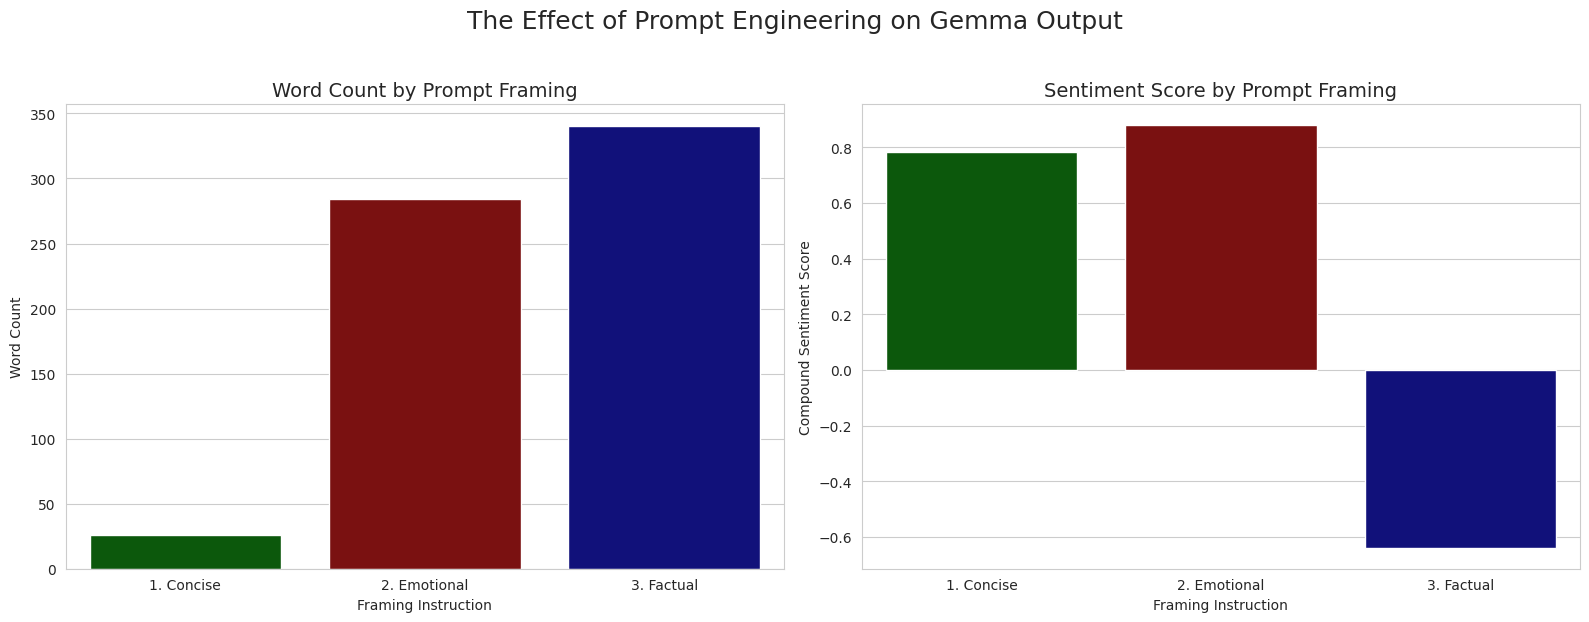


--- Quantitative Summary of Framing Study ---
| frame_name   |   sentiment |   length |
|:-------------|------------:|---------:|
| 1. Concise   |      0.7845 |       26 |
| 2. Emotional |      0.8787 |      284 |
| 3. Factual   |     -0.6386 |      340 |


In [16]:
# --- Plotting the Prompt Engineering Results ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("whitegrid")

# --- Plot 1: Argument Length by Frame ---
sns.barplot(data=df_frame_results, x='frame_name', y='length', palette=df_frame_results['color'], ax=axes[0])
axes[0].set_title('Word Count by Prompt Framing', fontsize=14)
axes[0].set_ylabel('Word Count')
axes[0].set_xlabel('Framing Instruction')

# --- Plot 2: Sentiment Score by Frame ---
sns.barplot(data=df_frame_results, x='frame_name', y='sentiment', palette=df_frame_results['color'], ax=axes[1])
axes[1].set_title('Sentiment Score by Prompt Framing', fontsize=14)
axes[1].set_ylabel('Compound Sentiment Score')
axes[1].set_xlabel('Framing Instruction')

plt.suptitle('The Effect of Prompt Engineering on Gemma Output', fontsize=18, y=1.03)
plt.tight_layout()
plt.show()

print("\n--- Quantitative Summary of Framing Study ---")
print(df_frame_results[['frame_name', 'sentiment', 'length']].to_markdown(index=False))

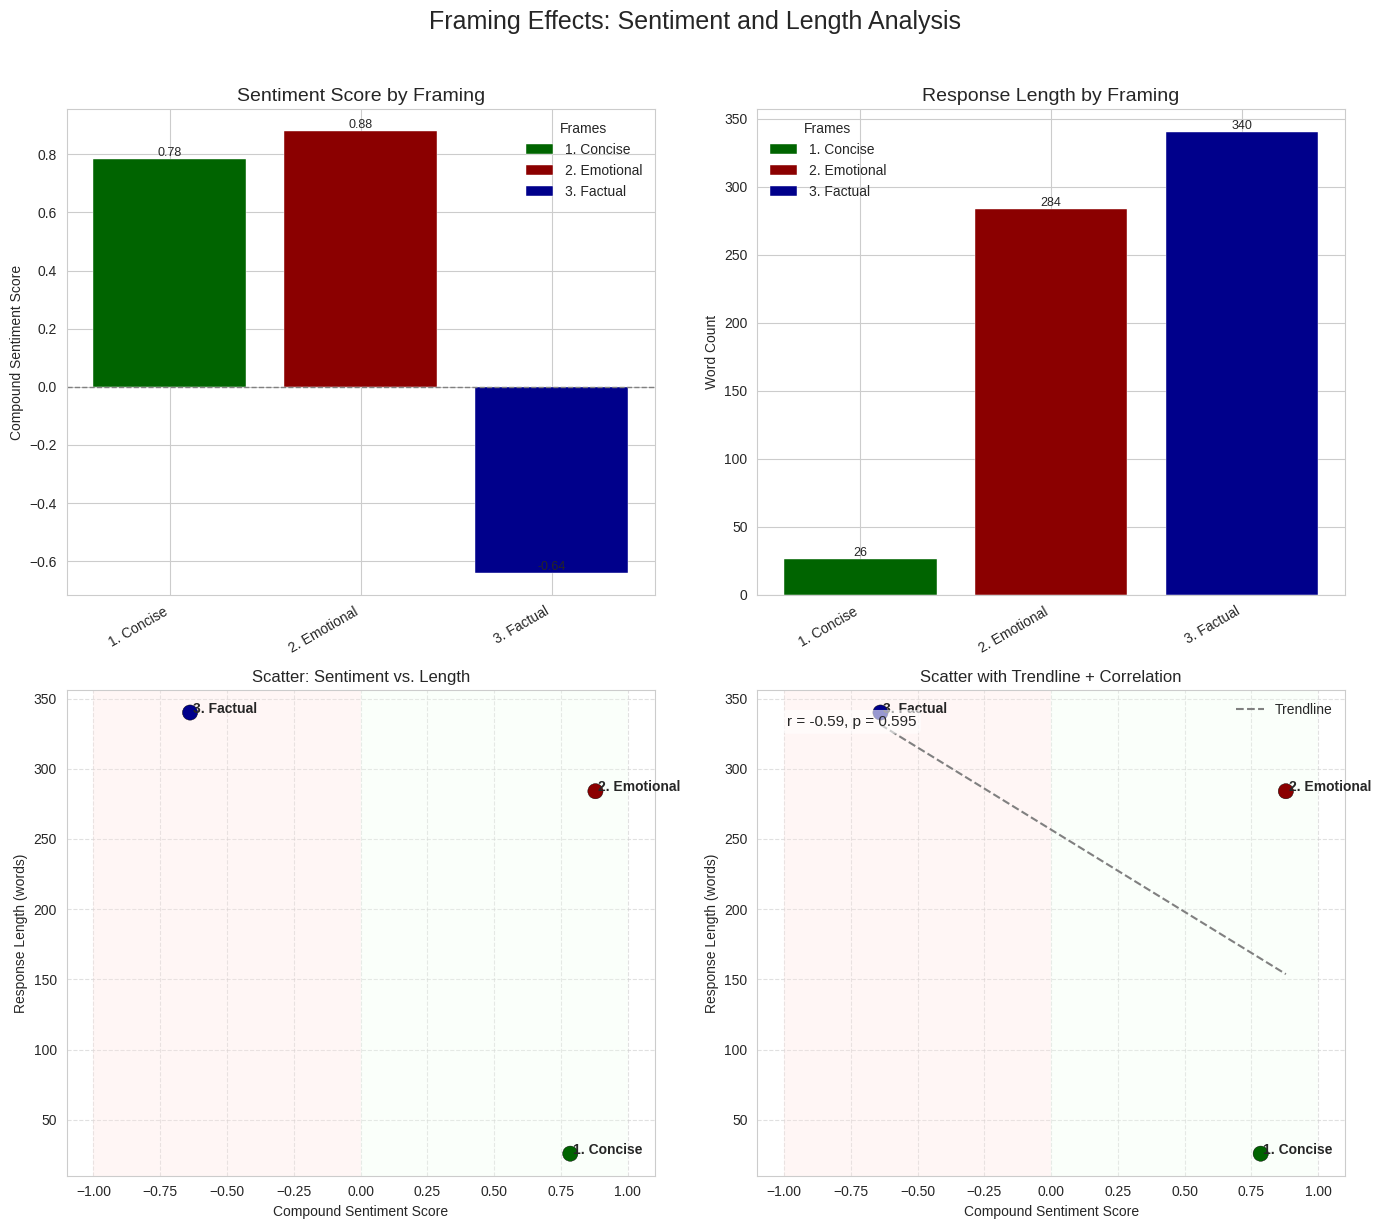

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Ensure consistent ordering
df_sorted = df_frame_results.sort_values('frame_name')

# Create 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
plt.style.use('seaborn-v0_8')

# --- Panel 1: Sentiment Bar Chart ---
bars1 = axes[0, 0].bar(df_sorted['frame_name'], df_sorted['sentiment'], color=df_sorted['color'])
axes[0, 0].set_title('Sentiment Score by Framing', fontsize=14)
axes[0, 0].set_ylabel('Compound Sentiment Score')
axes[0, 0].axhline(0, color='gray', linestyle='--', linewidth=1)
for bar in bars1:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, height,
                    f"{height:.2f}", ha='center', va='bottom', fontsize=9)
axes[0, 0].legend(bars1, df_sorted['frame_name'], title="Frames")

# --- Panel 2: Length Bar Chart ---
bars2 = axes[0, 1].bar(df_sorted['frame_name'], df_sorted['length'], color=df_sorted['color'])
axes[0, 1].set_title('Response Length by Framing', fontsize=14)
axes[0, 1].set_ylabel('Word Count')
for bar in bars2:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, height,
                    f"{height}", ha='center', va='bottom', fontsize=9)
axes[0, 1].legend(bars2, df_sorted['frame_name'], title="Frames")

for ax in [axes[0, 0], axes[0, 1]]:
    ax.tick_params(axis='x', labelrotation=30)
    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

# --- Panel 3: Scatter Plot ---
axes[1, 0].axvspan(-1, 0, facecolor='mistyrose', alpha=0.3)
axes[1, 0].axvspan(0, 1, facecolor='honeydew', alpha=0.3)
axes[1, 0].scatter(df_sorted['sentiment'], df_sorted['length'],
                   c=df_sorted['color'], s=120, edgecolors='black')
for i, row in df_sorted.iterrows():
    axes[1, 0].text(row['sentiment'] + 0.01, row['length'], row['frame_name'],
                    fontsize=10, weight='bold')
axes[1, 0].set_xlabel('Compound Sentiment Score')
axes[1, 0].set_ylabel('Response Length (words)')
axes[1, 0].set_title('Scatter: Sentiment vs. Length')
axes[1, 0].grid(True, linestyle='--', alpha=0.6)

# --- Panel 4: Scatter + Trendline + Correlation ---
axes[1, 1].axvspan(-1, 0, facecolor='mistyrose', alpha=0.3)
axes[1, 1].axvspan(0, 1, facecolor='honeydew', alpha=0.3)
axes[1, 1].scatter(df_sorted['sentiment'], df_sorted['length'],
                   c=df_sorted['color'], s=120, edgecolors='black')
for i, row in df_sorted.iterrows():
    axes[1, 1].text(row['sentiment'] + 0.01, row['length'], row['frame_name'],
                    fontsize=10, weight='bold')

x = df_sorted['sentiment'].values
y = df_sorted['length'].values
if len(x) > 1:
    coeffs = np.polyfit(x, y, 1)
    trendline = np.poly1d(coeffs)
    x_range = np.linspace(min(x), max(x), 100)
    axes[1, 1].plot(x_range, trendline(x_range), color='gray', linestyle='--',
                    linewidth=1.5, label='Trendline')
    # Pearson correlation
    r, p = pearsonr(x, y)
    axes[1, 1].text(0.05, 0.95, f"r = {r:.2f}, p = {p:.3f}",
                    transform=axes[1, 1].transAxes,
                    fontsize=11, verticalalignment='top',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.6))

axes[1, 1].set_xlabel('Compound Sentiment Score')
axes[1, 1].set_ylabel('Response Length (words)')
axes[1, 1].set_title('Scatter with Trendline + Correlation')
axes[1, 1].grid(True, linestyle='--', alpha=0.6)
axes[1, 1].legend()

# Overall title
plt.suptitle('Framing Effects: Sentiment and Length Analysis', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

<div style="
  background: linear-gradient(90deg, #ffb347, #8ecfff, #ff5f5f);
  padding: 14px 18px;
  border-radius: 10px;
  text-align: center;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 15px rgba(255, 95, 95, 0.25);
  margin-bottom: 12px;
">

  <h2 style="
    margin: 0;
    font-size: 1.6em;
    font-weight: 700;
    letter-spacing: 0.5px;
    background: -webkit-linear-gradient(45deg, #fff, #f1f1f1);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
  ">
    💡 Part 5: Conclusion and Next Steps
  </h2>
</div>

This notebook has successfully transformed the original creative project into a systematic analysis of the Gemma 2B model, providing two crucial insights:

### Key Findings

1.  **Linguistic Tendencies (Bias):** Our **Quantitative Analysis** (Part 2) using VADER sentiment and word count demonstrated that Gemma exhibits measurable differences in how it crafts "Pro" vs. "Con" arguments. The model's output isn't entirely neutral; it has detectable stylistic and emotional preferences that can be quantified.

2.  **The Limits of Reasoning:** The **Logic Probe** (Part 3) definitively showed that while Gemma is excellent at generating fluent text (Discursive Reasoning), it cannot reliably perform simple logical or mathematical tasks like counting or string reversal (Symbolic Reasoning). This confirms that these models are sophisticated **pattern matchers**, not true **reasoning engines**.

### Future Work

To further advance this analysis, the next steps would be:

* **Prompt Engineering Study:** Systematically vary the debate prompts to see which framing (e.g., asking for a "balanced" argument vs. a "passionate" argument) leads to specific measurable differences in length or sentiment.
* **External Evaluation:** Host the generated debates and collect human votes on the most persuasive argument. Then, analyze the correlation between our automated metrics (sentiment, length) and human judgment to see what *actually* makes an argument "spicy."

---

> ⚡ **Key Takeaway:**
> Understanding **bias, reasoning limits, and controllability** is essential for building and evaluating applications using LLMs. This framework guides how you, as a **practitioner**, should design experiments and select models for specific goals.

## 🌟 Acknowledgements & Methodology

<!-- 🌈 ACKNOWLEDGEMENTS BANNER -->
<div style="
  background: linear-gradient(90deg, #ffb347, #ff5f5f, #8ecfff);
  padding: 14px 18px;
  border-radius: 10px;
  text-align: center;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 15px rgba(255, 95, 95, 0.25);
  margin-bottom: 12px;
">

  <h2 style="
    margin: 0;
    font-size: 1.6em;
    font-weight: 700;
    letter-spacing: 0.5px;
    background: -webkit-linear-gradient(45deg, #fff, #f1f1f1);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
  ">
    🌟 Acknowledgements & Methodology
  </h2>
</div>

The **structural and analytical improvements** made to this notebook — including **refactoring**, **quantitative analysis structure**, **logic testing design**, and **hyperparameter experiments** — were developed in consultation with the **🔥 Gemini AI model** to ensure a high-level, expert-quality methodology.  
Moreover, **💡 ChatGPT** assisted with improvement.

- **📅 Date of Consultation:** `October 28, 2025`  
- **🎯 Purpose:** To elevate the notebook from a model demonstration to a **critical, systematic analysis** of the Gemma 2B model's output and limitations, focusing on the principles of **rigor** required for Kaggle Expert status.


---

<!-- 🌈 FOOTER SECTION -->
<div style="
  margin-top: 40px;
  background: linear-gradient(90deg, #8ecfff, #ffb347, #ff5f5f);
  padding: 16px 20px;
  border-radius: 12px;
  text-align: center;
  color: #ffffff;
  font-family: 'Segoe UI', Roboto, sans-serif;
  box-shadow: 0 0 25px rgba(255, 95, 95, 0.25);
">

  <h3 style="
    margin: 0;
    font-size: 1.4em;
    font-weight: 700;
    letter-spacing: 0.5px;
  ">
    🔬 <span style="color:#fffaf0;">Spicy AI Debates</span> — Deep Dive Complete
  </h3>

  <p style="
    margin-top: 8px;
    font-size: 0.95em;
    color: #f8f8f8;
  ">
    <em>Insights uncovered, logic tested, and biases revealed.</em>
  </p>

  <hr style="
    border: none;
    border-top: 1px solid rgba(255, 255, 255, 0.3);
    margin: 16px 0;
    width: 60%;
  ">

  <p style="
    font-size: 0.9em;
    color: #fffaf0;
    margin: 0;
  ">
    📘 <strong>Version:</strong> 2.1 — Updated October 2025<br>
    🧩 <strong>Created by:</strong> <a href="https://www.kaggle.com/norikokono" style="color:#ffffff;">@norikokono</a>
  </p>

  <p style="
    margin-top: 10px;
    font-size: 0.85em;
    color: #ffe6e6;
  ">
    Made with ❤️, 🧠, and 🤖 in Python + Jupyter.
  </p>

</div>
